## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **This is a Individual Notebook of Shubham Deepak Deshmukh.**

# **Business Goal**

Booking cancellations and Very less or zero number of Hotel Bookings during some months of a year are undoubtedly two major problems for any revenue manager or hotel manager nowadays.This will not only results to the loss of profits But may also leads to the some extra burden on Hotels.

So, what can hotels do to reduce these uncertainities and maximize their product and revenue? A lot can be done with revenue management techniques when it comes to rates, like reducing the cost of a room during low Booking   days,over Booking methods to reduce the burden of cancelation rates, giving some extra facilities to the customers. But nowadays you have to apply similar restrictions to those applied by your competitive set and hotels around you, so if you are going to be stricter, costumers will prefer other hotels that are more permissive.

Therefore it would seem that we have a complex problems and not a viable solution. However, thanks to data science and machine learning there are many things we can do to find which months were the hotel receiving a very less number of Bookings and  the number of Cancelations.

 In the next chapters we are going to take on a public dataset of hotel bookings and apply an EDA (Exploratory Data Analysis) to understand the data and use descriptive analysis techniques to get a full picture of its behavior.

# For Simplicity purpose, I followed these steps.
A) Data exploration

B) Handelling missing values 

C) Handelling numerical features and categorical featuress.

D)Correlation matrix and draw some conclusion

E)Solved problems and tried to found some relations between variables.

F)Final Summary 

##**Importing**

In [1]:
#Import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import folium
sns.set(color_codes = True)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.patches as mpatches

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Colab Notebooks/Capstone Project/Hotel Bookings.csv'
imdb_df = pd.read_csv(path)

# **Data Exploration**

In [4]:
imdb_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
imdb_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
imdb_df.shape

(119390, 32)

In [7]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
imdb_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

* hotel: hotel type(H1 = Resort Hotel or H2 = City Hotel)

* is_canceled: Value indicating if the booking was canceled (1) or not (0)

* lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* arrival_date_year: Year of arrival date

* arrival_date_month: Month of arrival date

* arrival_date_week_number: Week number of year for arrival date
 
* arrival_date_day_of_month: Day of arrival date

* stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the 

  guest stayed or booked to stay at the hotel

* stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed

* adults: Number of adults

* children: Number of children

* babies: Number of babies

* meal: Type of meal booked.Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board ; FB – Full board

* country: Country of origin. 
market_segment:“TA”-“Travel Agents” & “TO”-“Tour Operators”.
distribution_channel: Booking distribution channel. The term “TA”-“Travel Agents” and “TO”-“Tour Operators”.

* is_repeated_guest:repeated guest (1) or not (0)

* previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking

* previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking.

* reserved_room_type: Code of room type reserved. 

* assigned_room_type: Code for the type of room assigned to the booking. 

* booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

* deposit_type: Indication on if the customer made a deposit to guarantee the booking.No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

* agent: ID of the travel agency that made the booking

* company: ID of the company/entity.

* days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer.

* customer_type:Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract; Transient-party – when the booking is transient, but is associated to at least other transient booking.

* adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.

* required_car_parking_spaces: Number of car parking spaces required by the customer

* total_of_special_requests: Number of special requests made by the customer.

* reservation_status: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.

* reservation_status_date: Date at which the last status was set.

# **DEALING** **WITH MISSING VALUES**

**Check if our data contains any missing values**

In [9]:
missing_data = pd.DataFrame([imdb_df.isnull().sum(),imdb_df.isnull().sum()*100.0/imdb_df.shape[0]]).T
missing_data.columns = ['No. of Missing Data', '% Missing Data']
missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.000000
is_canceled,0.0,0.000000
lead_time,0.0,0.000000
arrival_date_year,0.0,0.000000
arrival_date_month,0.0,0.000000
arrival_date_week_number,0.0,0.000000
arrival_date_day_of_month,0.0,0.000000
stays_in_weekend_nights,0.0,0.000000
stays_in_week_nights,0.0,0.000000
adults,0.0,0.000000


Now that we have understood that there are 4 features with null values (Company, agent, country, children). We’ll deal each column separately. Now when we have dig deeper into the dataset to understand about each feature.

Children column contains the count of children, so we will replace all the missing values with the rounded mean value.

And our country column contains country codes representing different countries. It is a categorical feature so I will also replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often.

Agent Column has only 13.68% missing values so dropping column is not good idea because missing values is less than 40 %.So we will replace missing values with '0'.

In [10]:
# for missing children value, replace it with rounded mean value
imdb_df['children'].fillna(round(imdb_df.children.mean()), inplace=True)

In [11]:
## For the missing values in the country column, replace it with mode (value that appears most often)
imdb_df['country'].fillna(imdb_df.country.mode().to_string(), inplace=True)

In [12]:
imdb_df['agent'] = imdb_df['agent'].fillna(0.0)

'Company' column having highest number of missing values that is 94.3 % .This column is not useful for us for further data analysis Now here we are not dealing with this column so we are droping this column.

In [13]:
#Drop the columns agent and company because these data will not require for analysis part.
df = imdb_df.drop(columns=['company'], axis = 1)
df.shape

(119390, 31)

Dropping the unnecessary data can imply a reduction of the sample size. This can help us from proceeding with the analysis.

In [14]:
#rows containing duplicate data
Duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows = ",Duplicate_rows_df.shape)

Number of duplicate rows =  (32001, 31)


In [15]:
#Drop the Duplicate rows 
df = df.drop_duplicates()

Dropping the rows which contains the data of adult,childrern and babies with 0 values is required because its shows that no guest booked any hotel so we can reduce the our data set.

In [16]:
## Drop Rows where there is no adult, baby and child
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

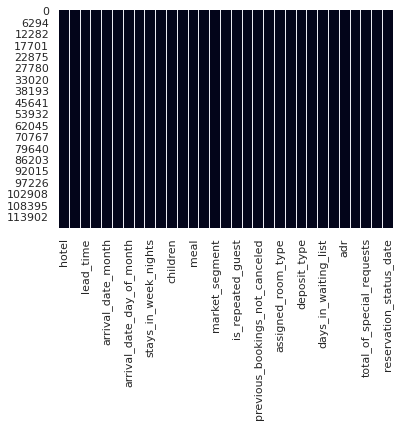

In [17]:
#Dropping the null values 
df =df.dropna()
#check Whether the data set has null value or not 
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

# Converting Datatype

In [18]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Here reservation status date is in object type.

we convert it into a date-Time format

In [19]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [20]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [21]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,87223,87223.000000,87223.000000,87223.000000,87223,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223,87223,87223,87223,87223.000000,87223.000000,87223.000000,87223,87223,87223.000000,87223,87223.000000,87223.000000,87223,87223.000000,87223.000000,87223.000000,87223,87223
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,178,8,5,NaN,NaN,NaN,9,11,NaN,3,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14 00:00:00
freq,53272,NaN,NaN,NaN,11242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67900,27351,51550,69025,NaN,NaN,NaN,56430,46279,NaN,86078,NaN,NaN,71858,NaN,NaN,NaN,63214,211
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-17 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-14 00:00:00
mean,NaN,0.275260,79.976864,2016.210369,NaN,26.834516,15.815989,1.004666,2.624079,1.879413,0.138908,0.010846,NaN,NaN,NaN,NaN,0.038568,0.030405,0.184068,NaN,NaN,0.268519,NaN,81.092808,0.746351,NaN,106.519872,0.084313,0.698956,NaN,NaN
std,NaN,0.446648,86.059628,0.686055,NaN,13.668994,8.835643,1.027421,2.039837,0.621713,0.456281,0.113708,NaN,NaN,NaN,NaN,0.192564,0.369359,1.733102,NaN,NaN,0.710657,NaN,109.978439,10.001400,NaN,54.890351,0.281669,0.832055,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,0.000000,NaN,72.250000,0.000000,0.000000,NaN,NaN


In [22]:
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [23]:
categorical_columns=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

##**Data Analysis**

##**Handelling Numerical Features**

**Univariate analysis**

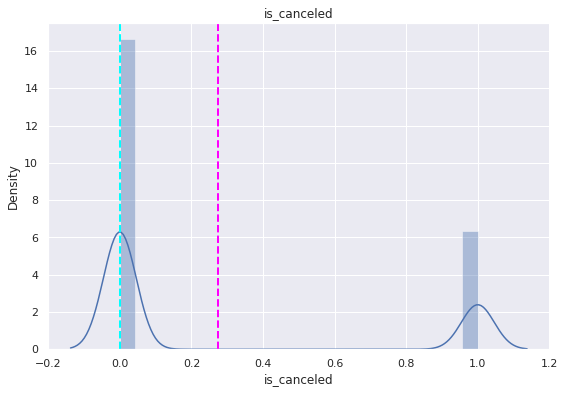

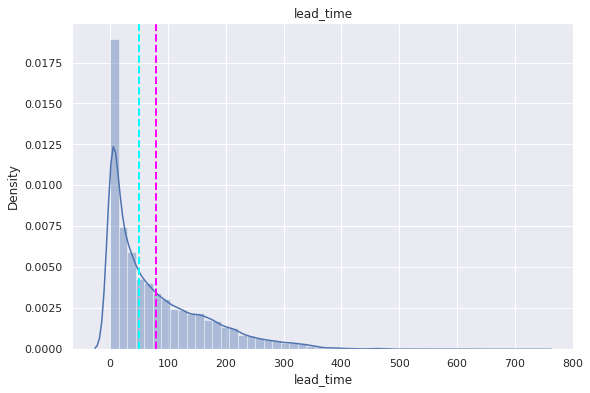

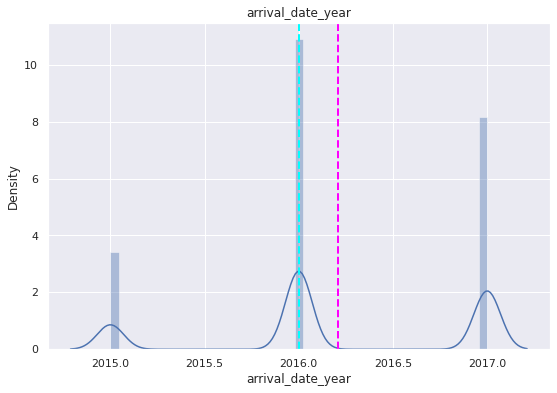

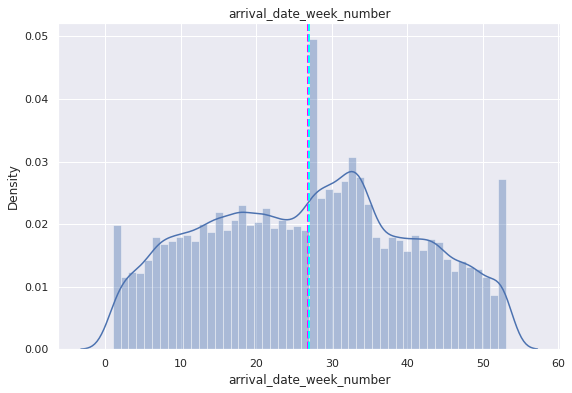

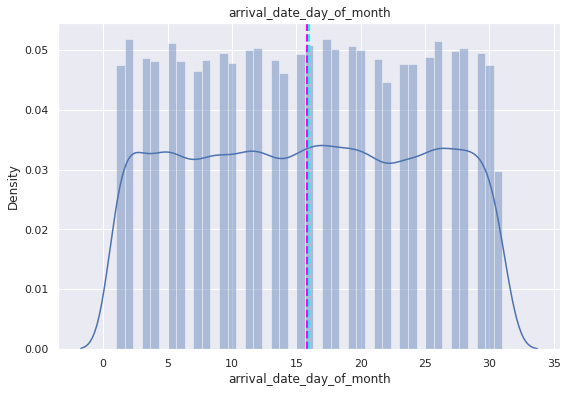

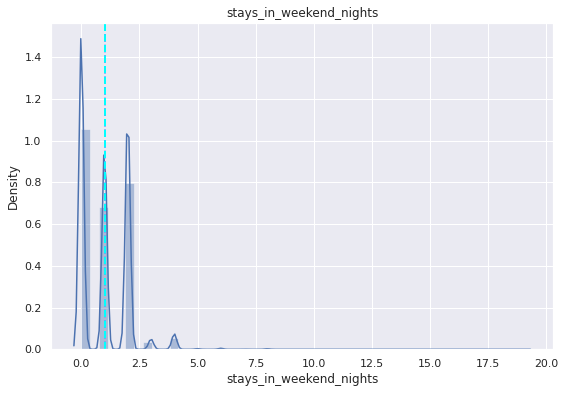

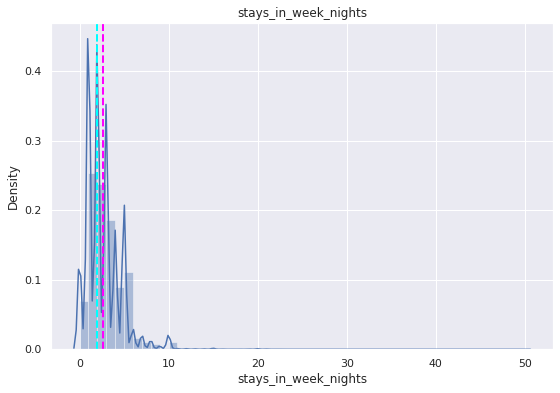

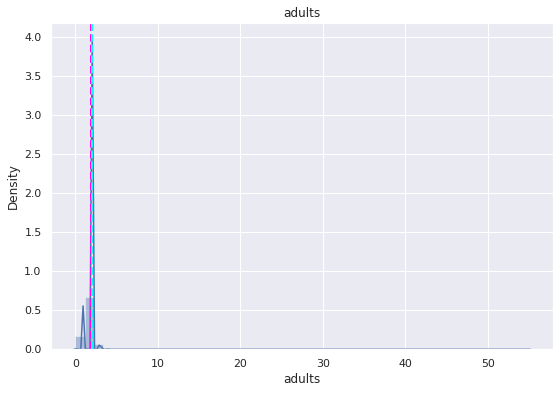

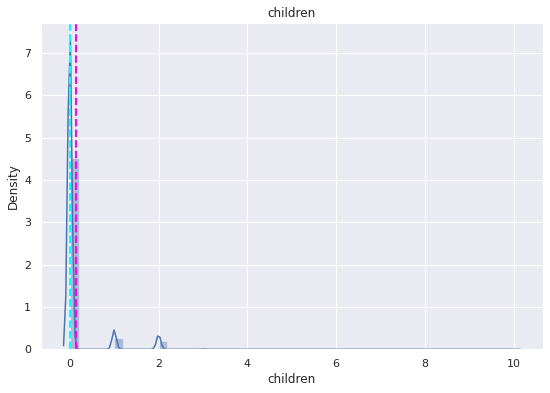

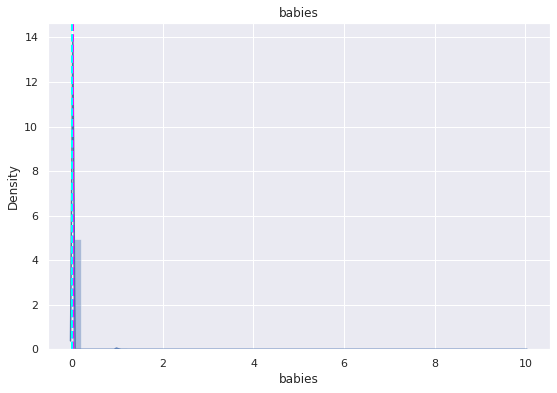

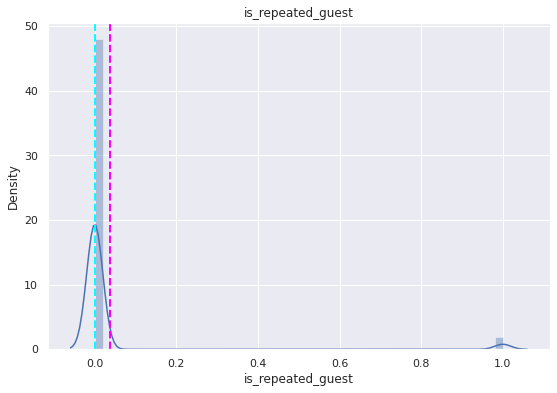

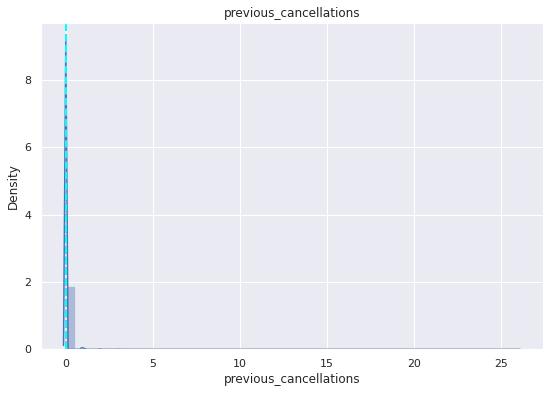

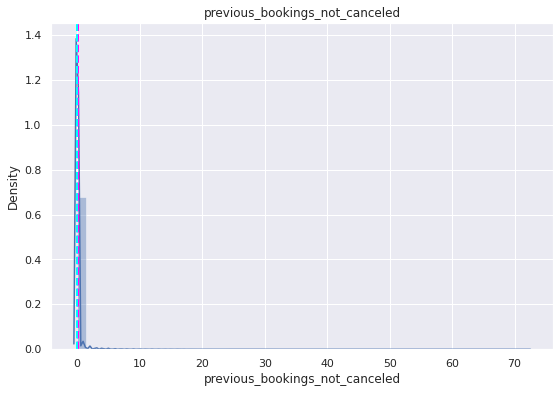

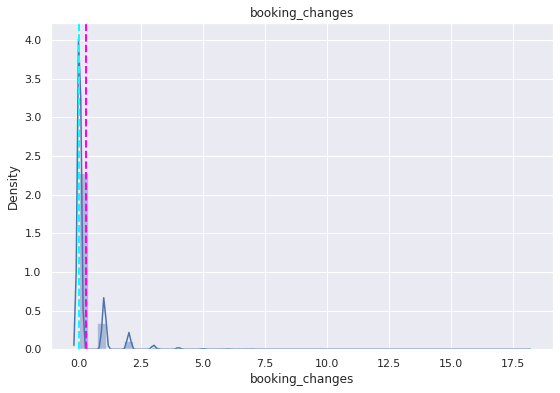

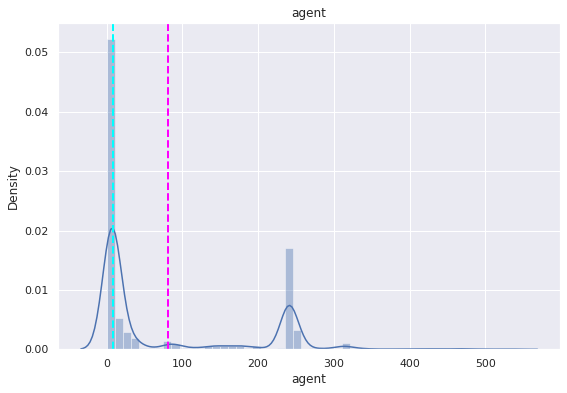

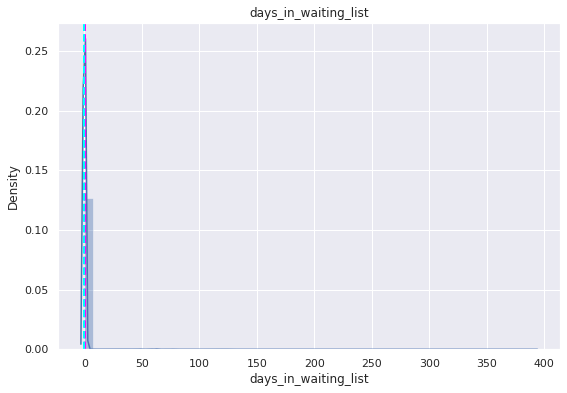

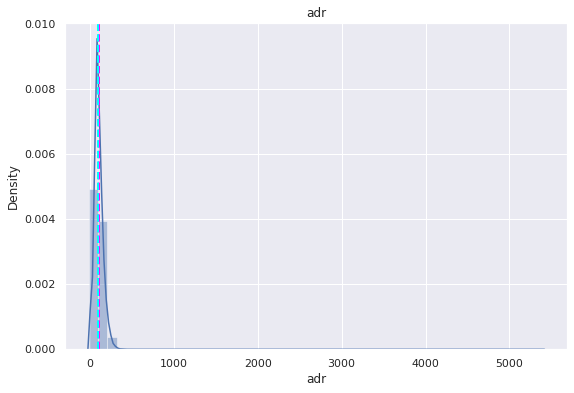

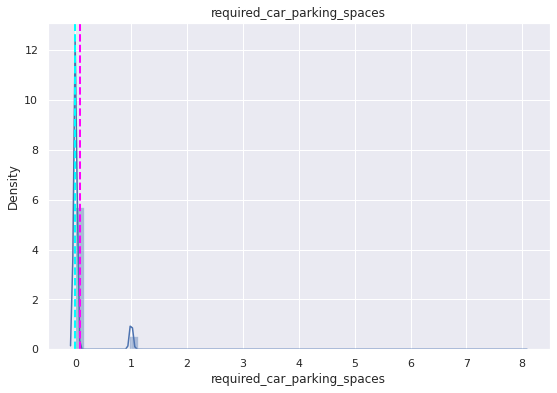

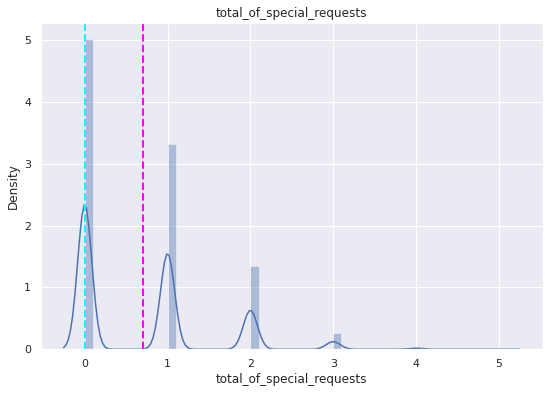

In [24]:
#plot a bar plot for each numerical feature count with Dist Plot
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

**Bivariate Analysis**

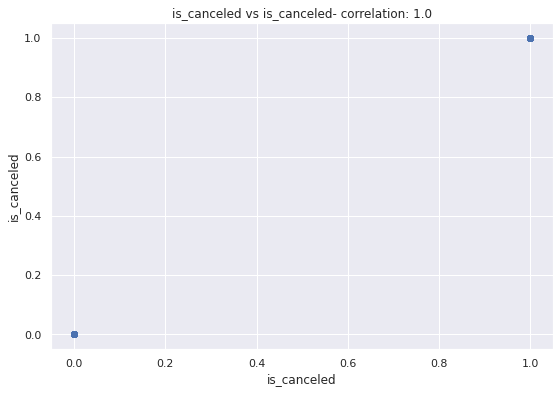

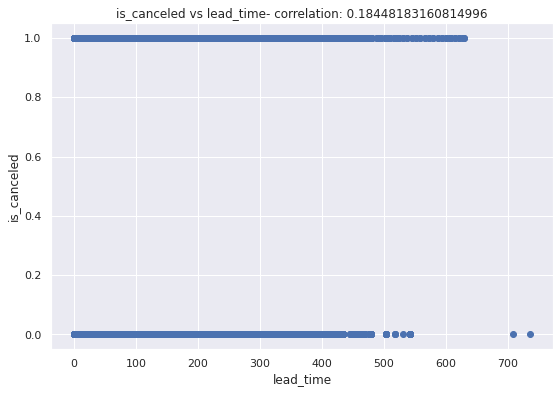

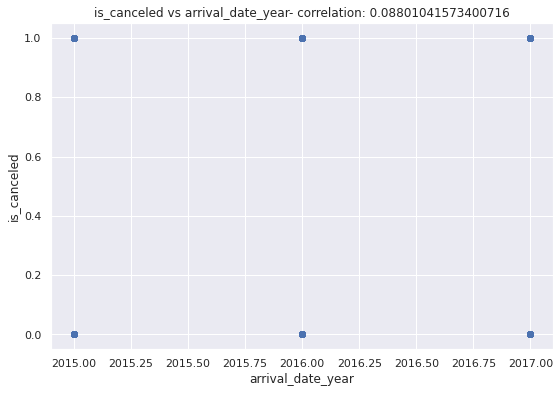

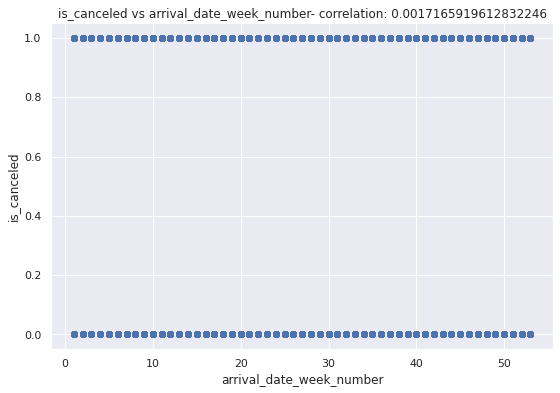

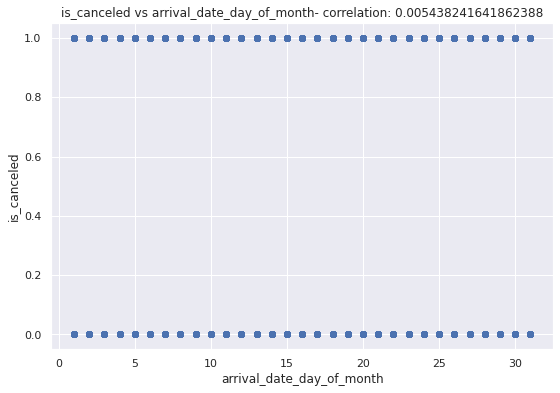

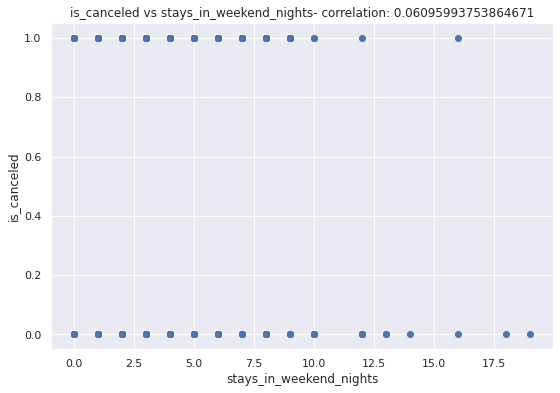

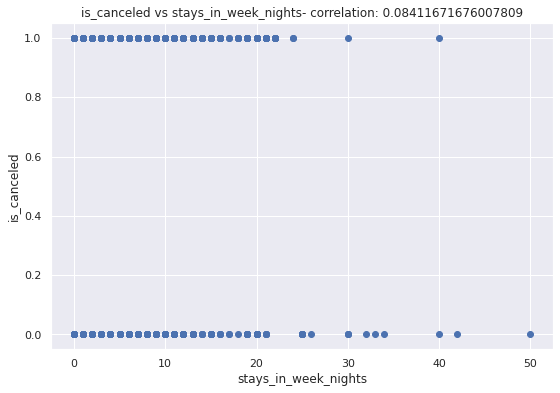

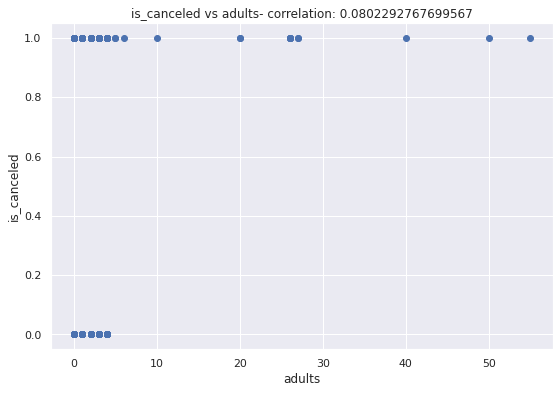

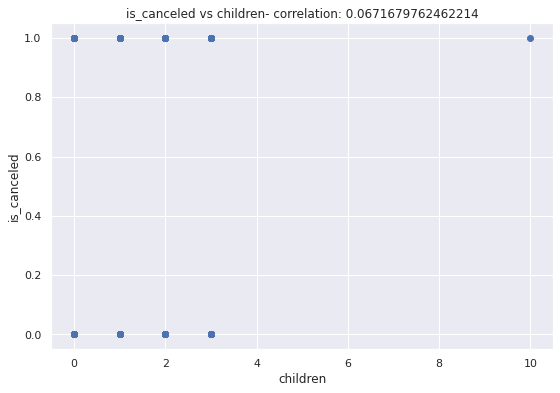

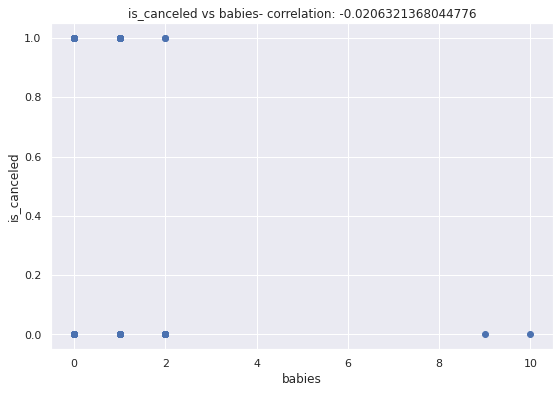

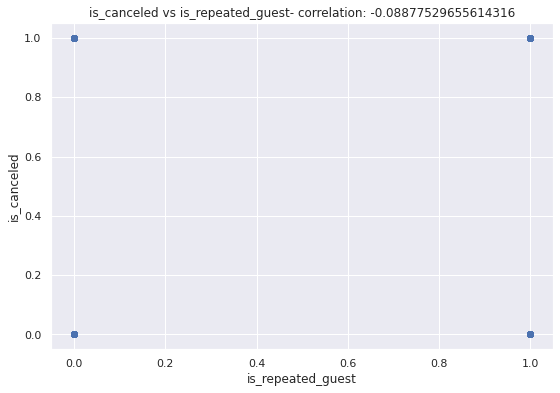

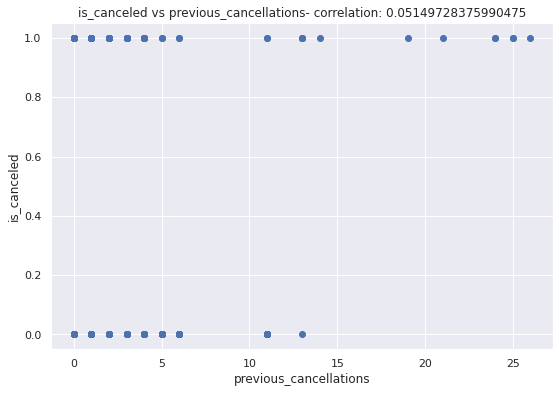

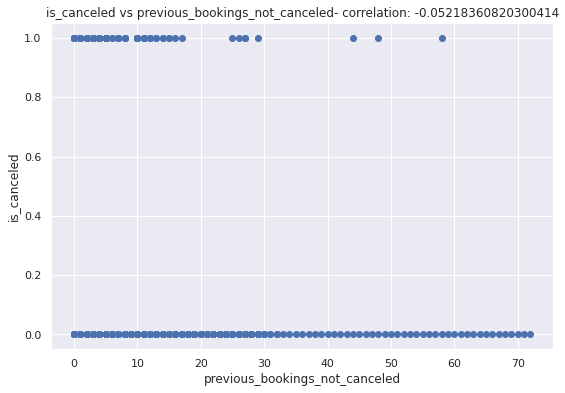

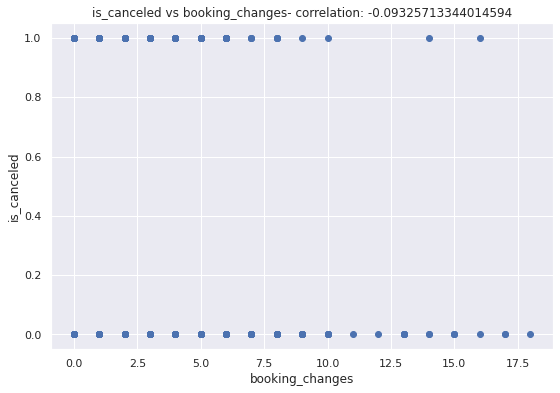

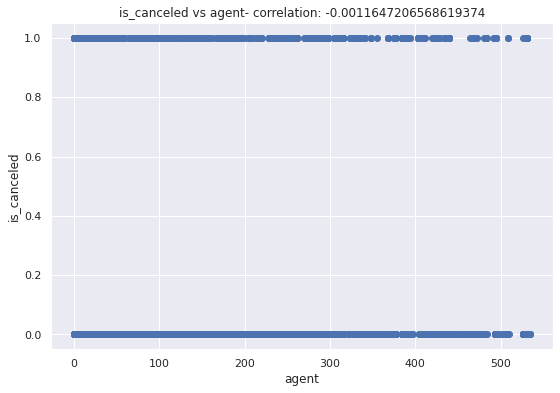

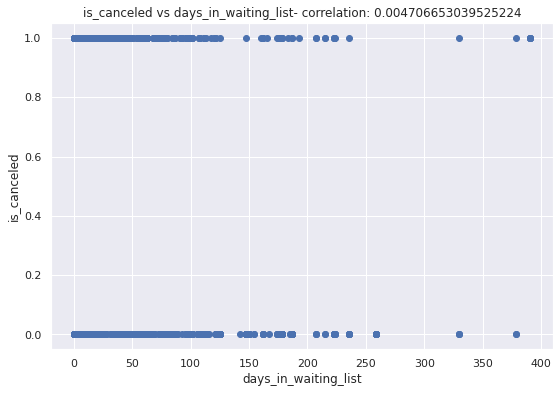

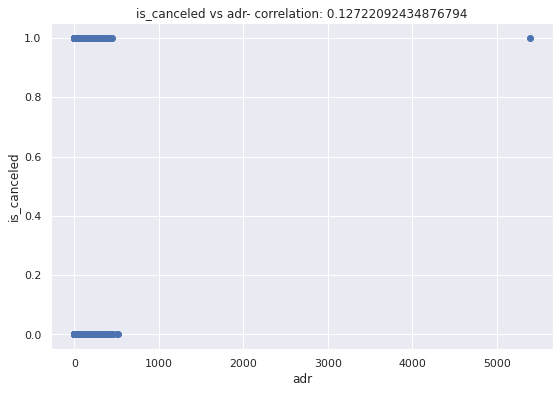

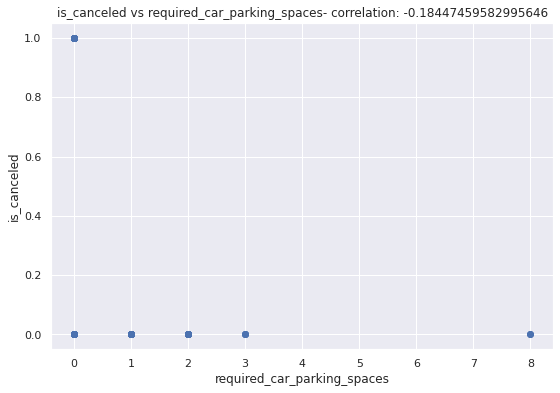

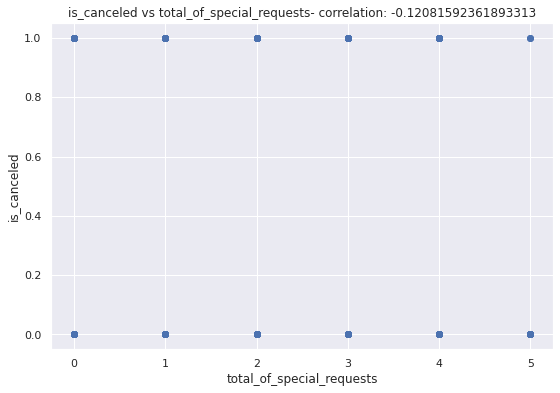

In [25]:
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=df[col]
  label=df['is_canceled']
  correlation= feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('is_canceled')
  ax.set_title('is_canceled vs ' +col +'- correlation: '+ str(correlation))


###**Hotel industry is also driven by the Customer Experience.we need to keep a track of the type of room preferred, the breakfast requirements and any other factor that might enhance customer experience. This makes analyzing the service indicators important which will help hotel to plan better for enhancing the customer experience.**

##**Handelling Categorical Features**

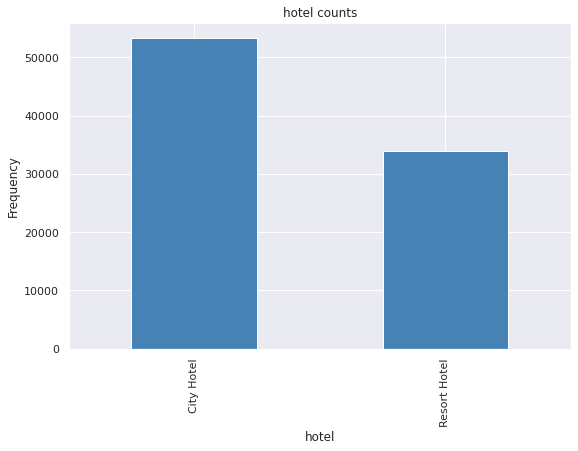

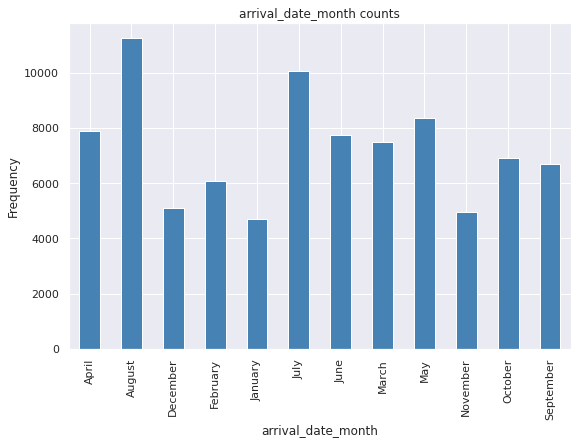

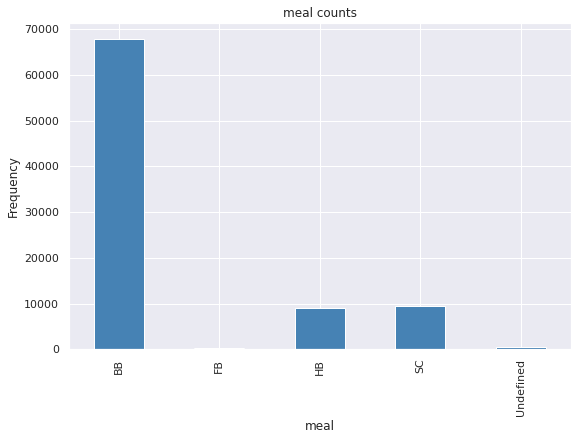

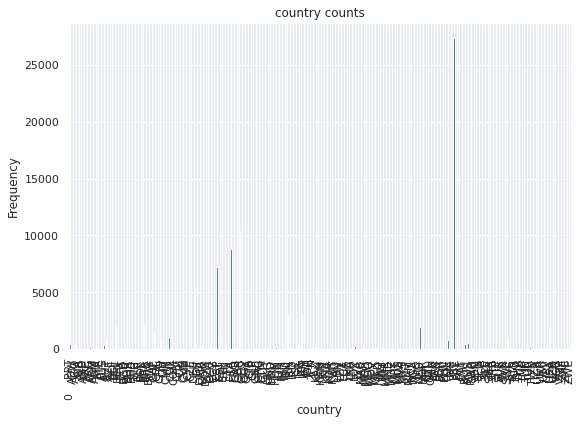

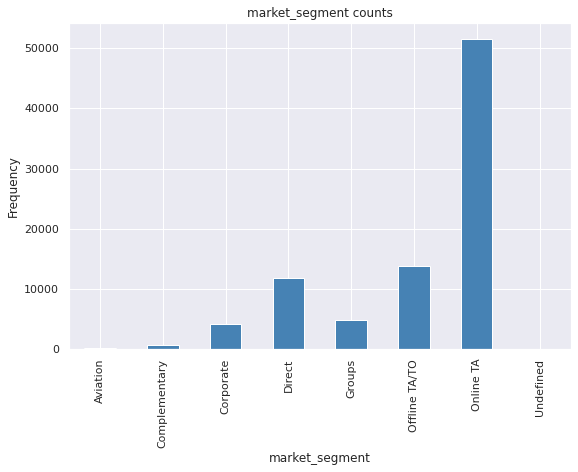

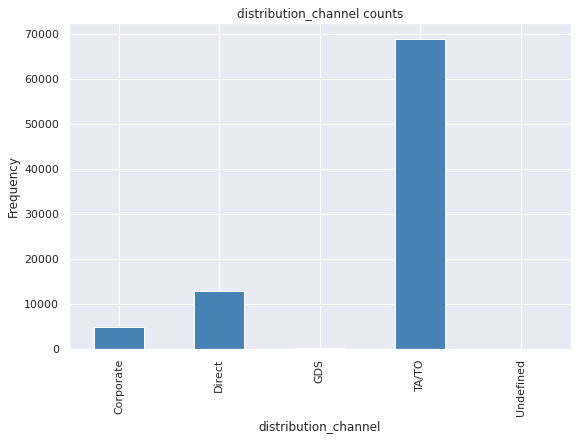

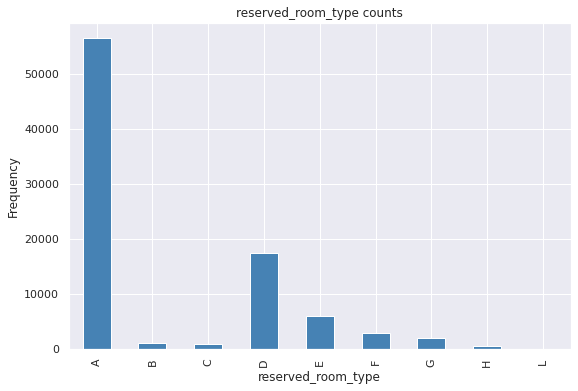

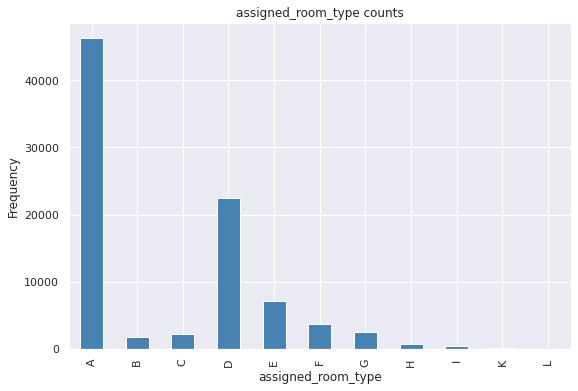

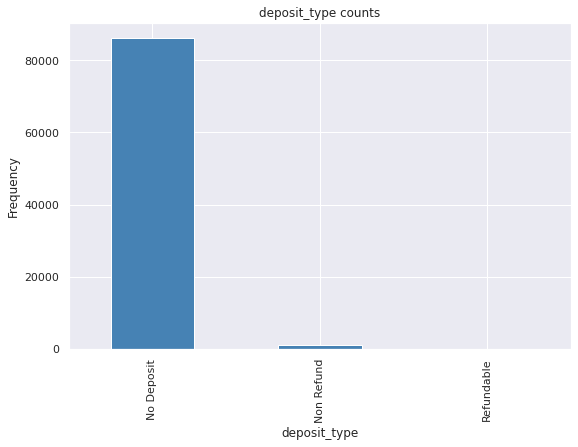

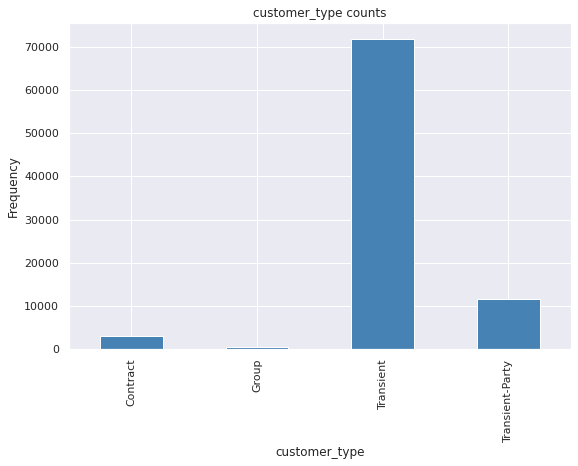

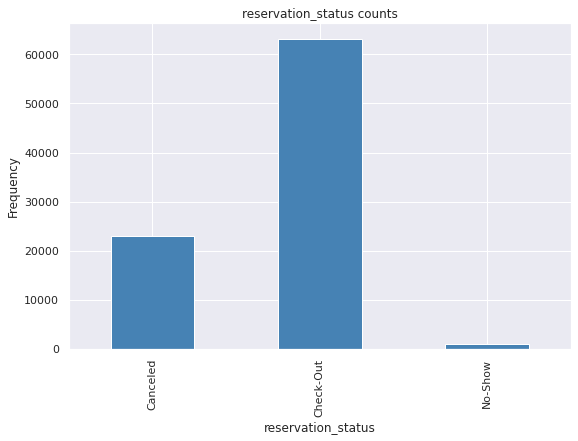

In [26]:
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

##**Insights from above analysis:-**

1)Customers Tends to book city type hotel more as compared with resort type hotel.

2)Customer Booked the hotel highest in month of August.

3)Customer prefer most breakfast in meal.

4)Customers reserved mostly 'A' type of rooms.

5)Transient type of customer had highest number of booking.

**Bivariate Analysis**

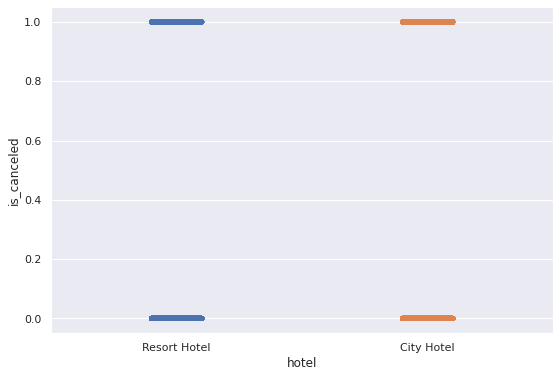

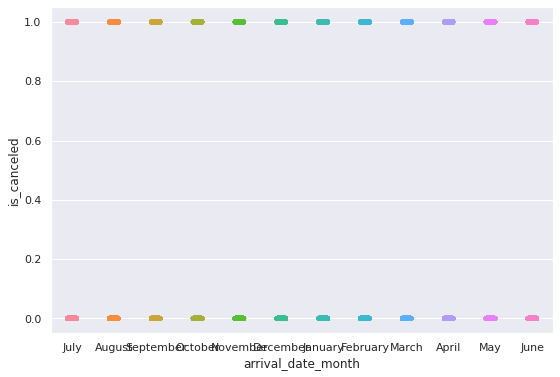

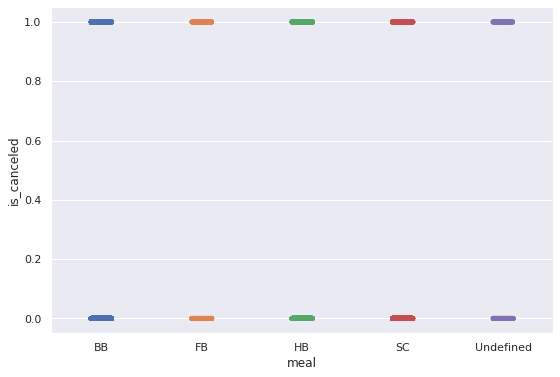

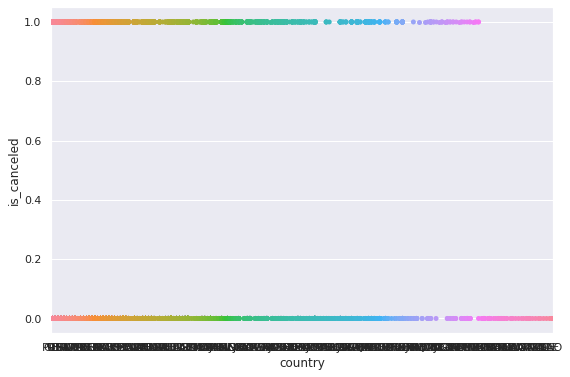

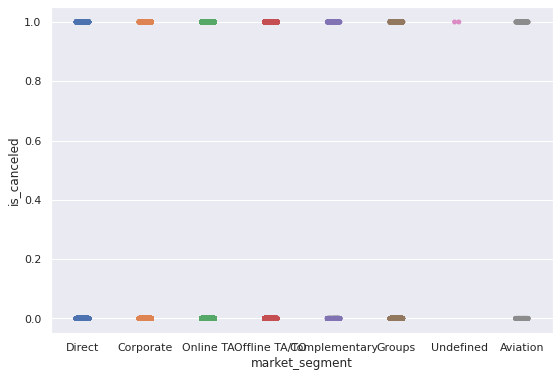

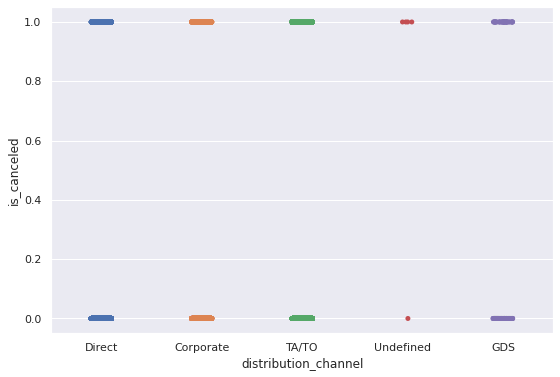

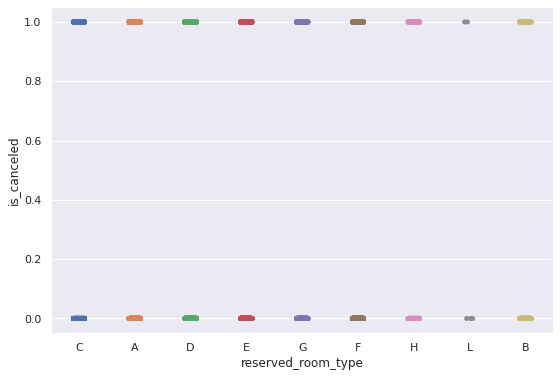

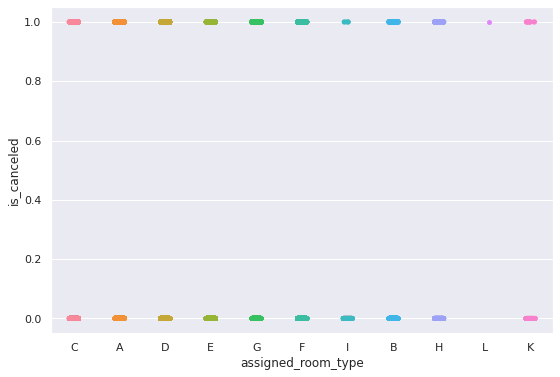

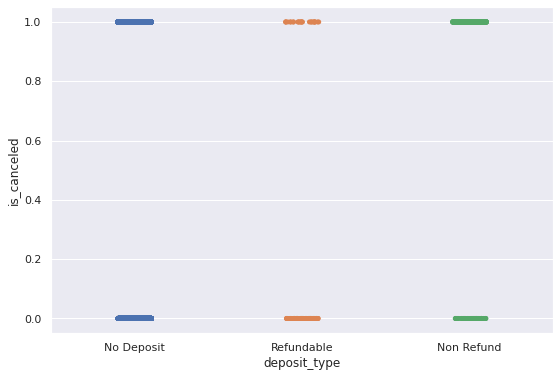

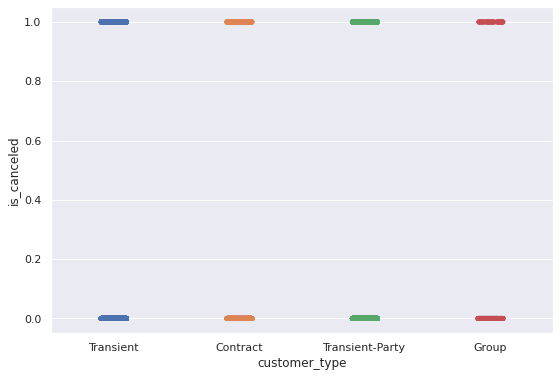

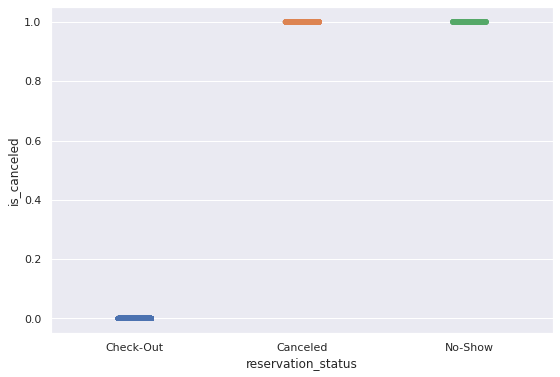

In [27]:
for col in categorical_features:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(x=df[col],y=df.is_canceled)

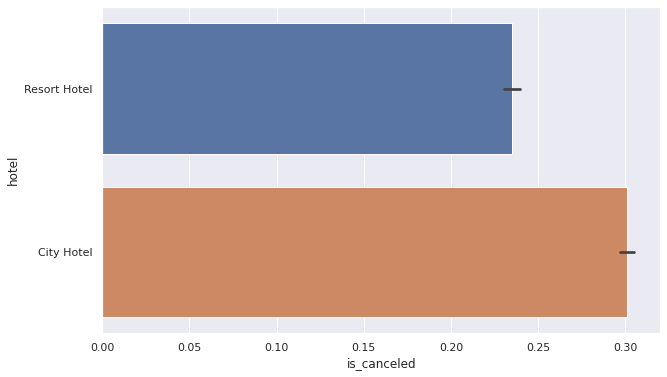

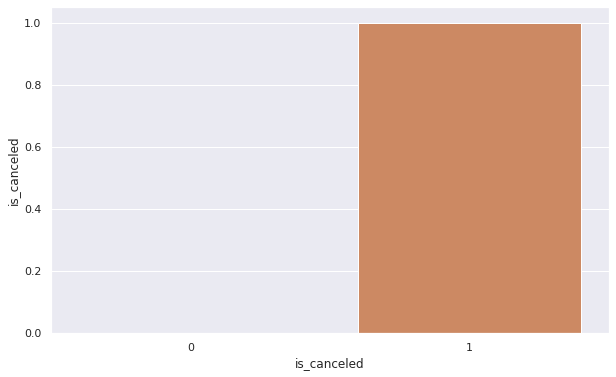

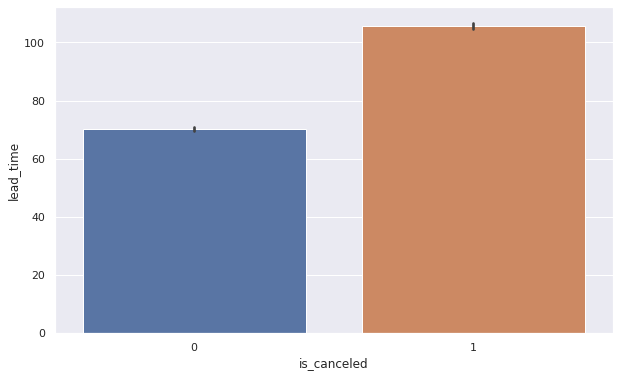

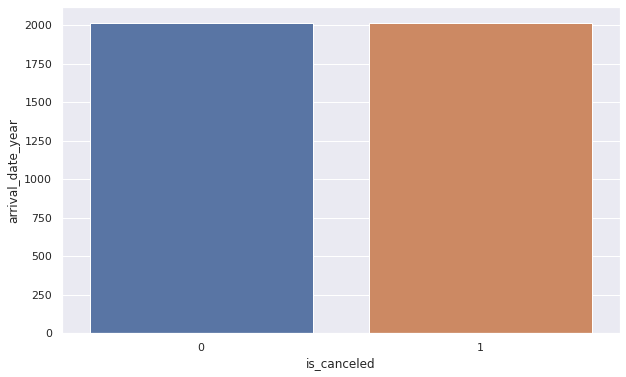

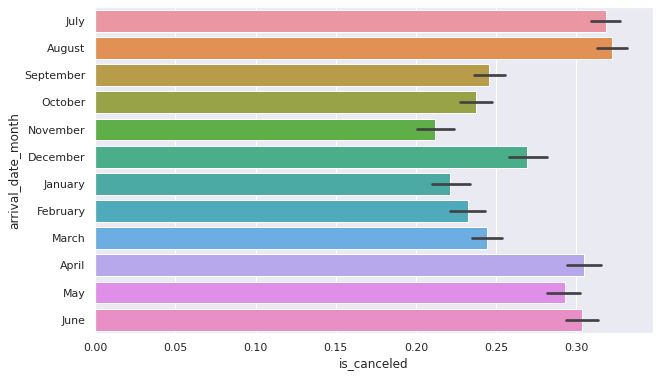

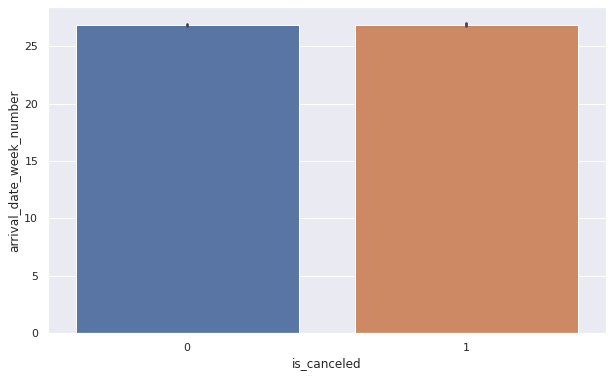

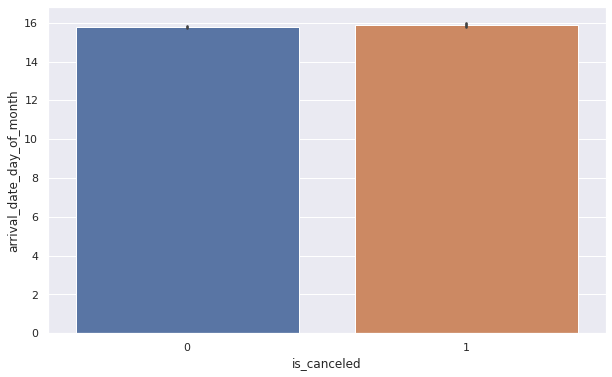

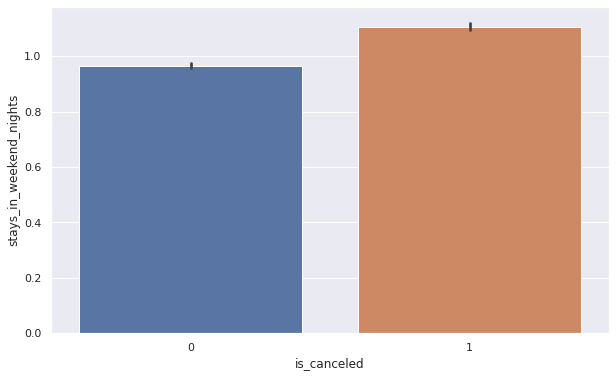

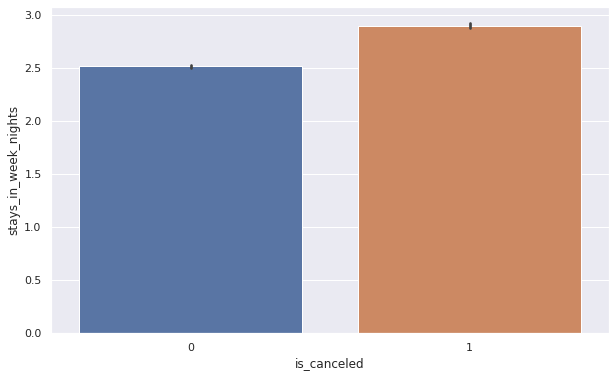

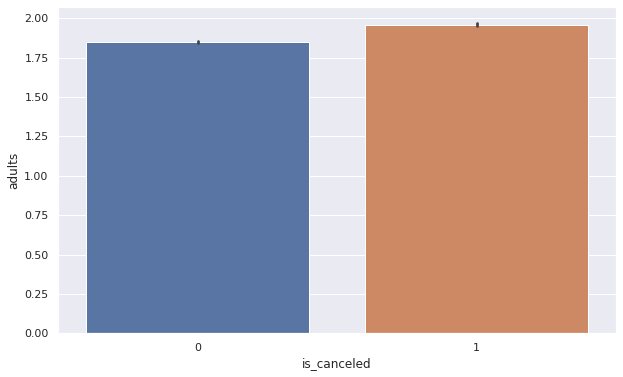

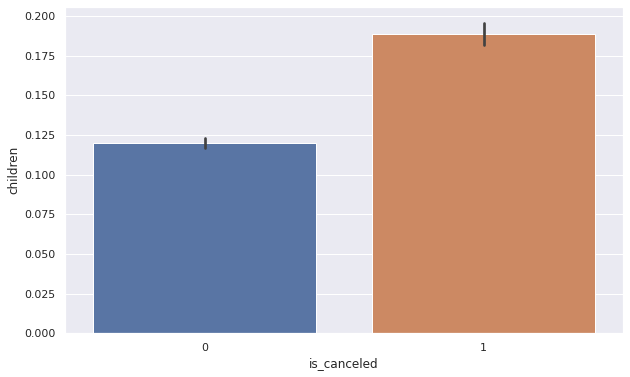

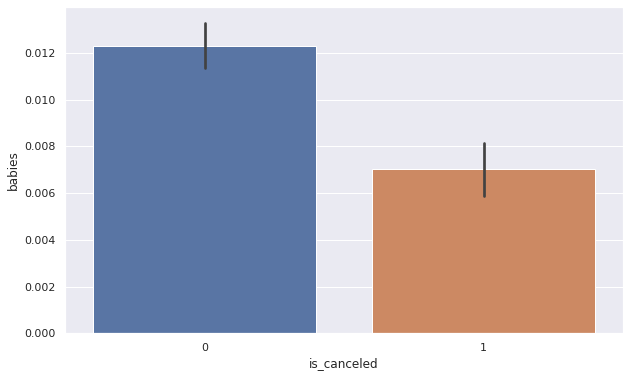

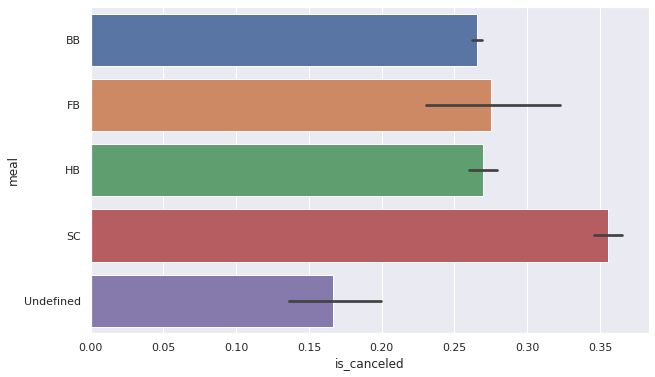

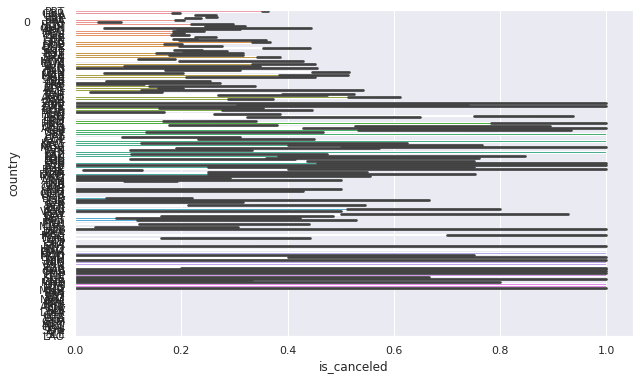

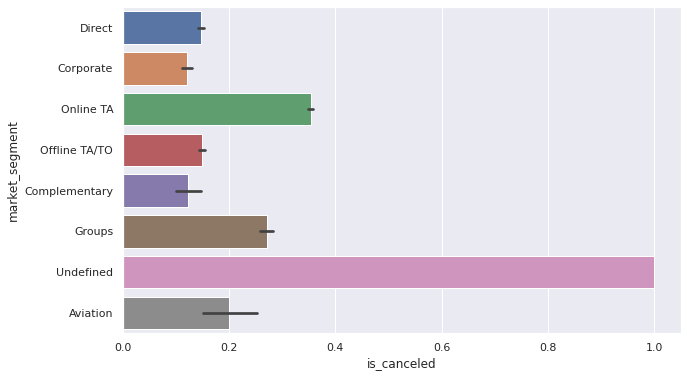

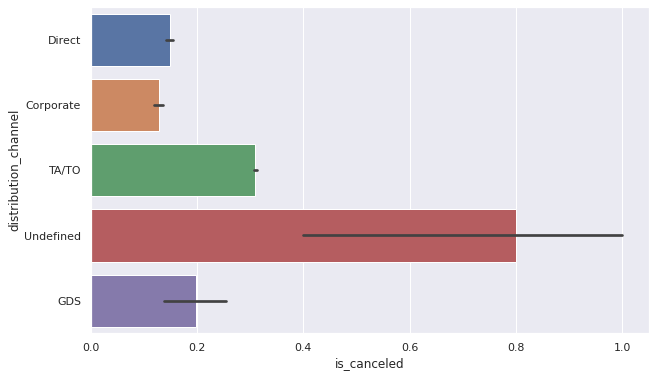

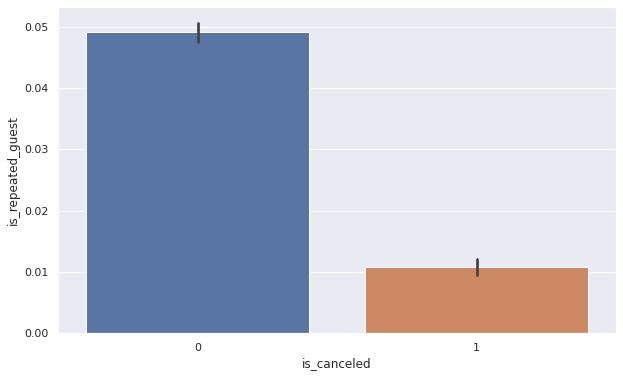

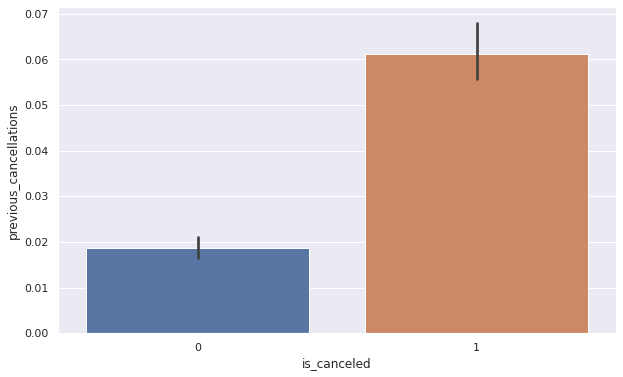

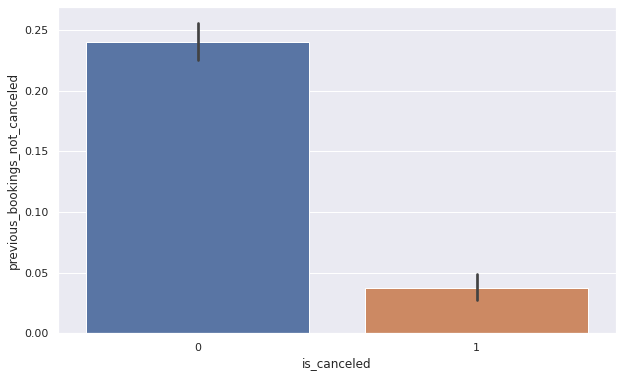

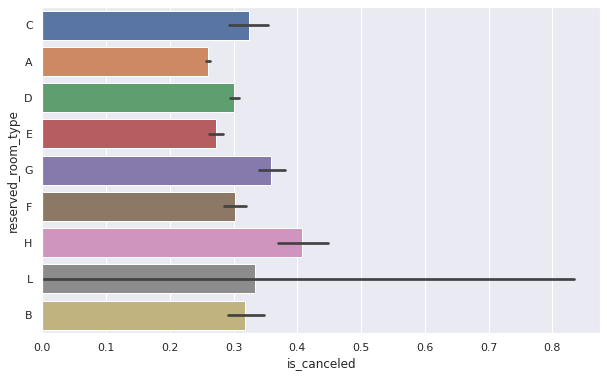

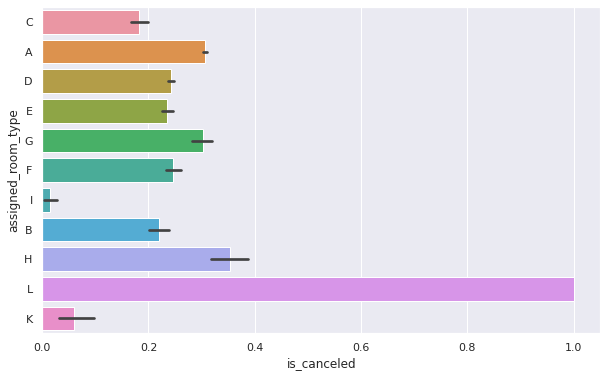

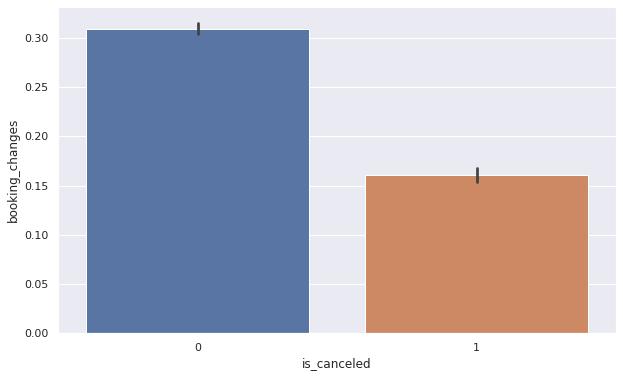

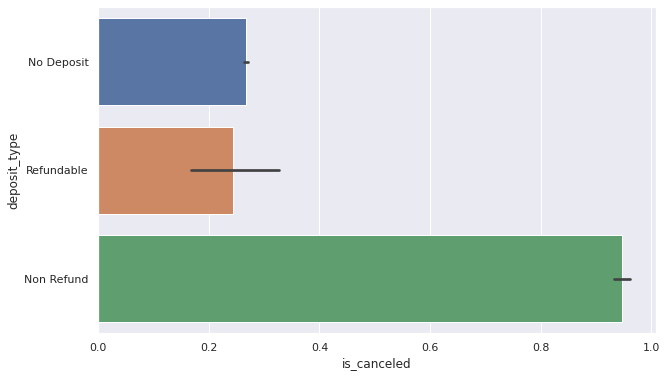

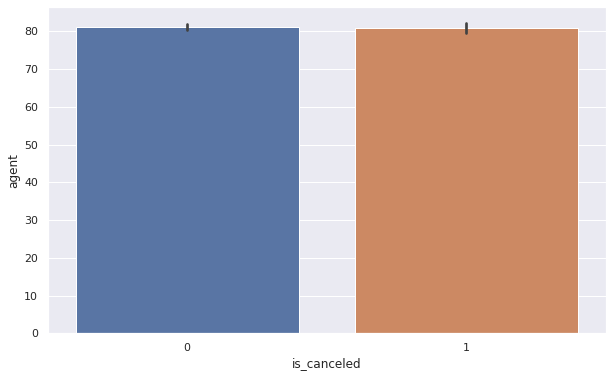

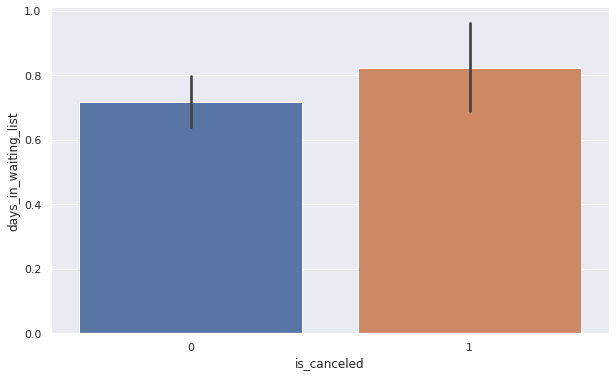

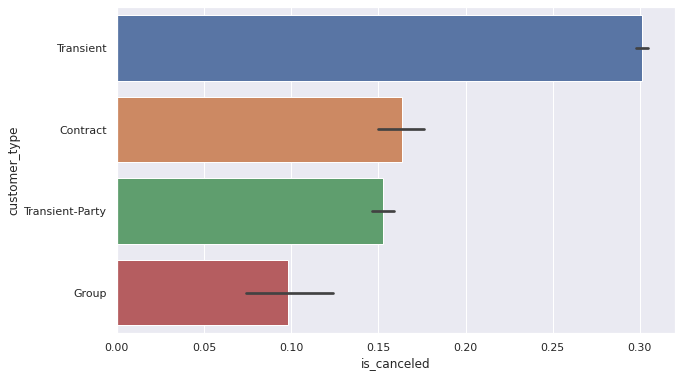

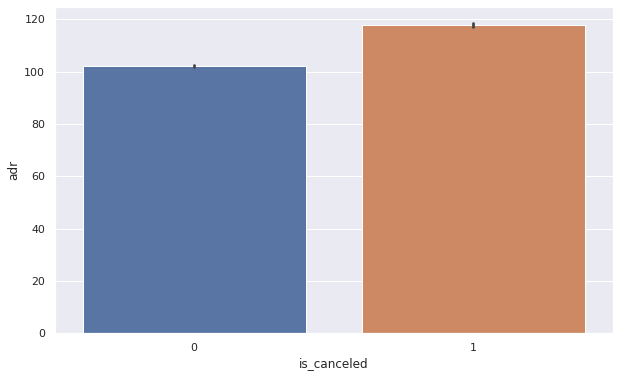

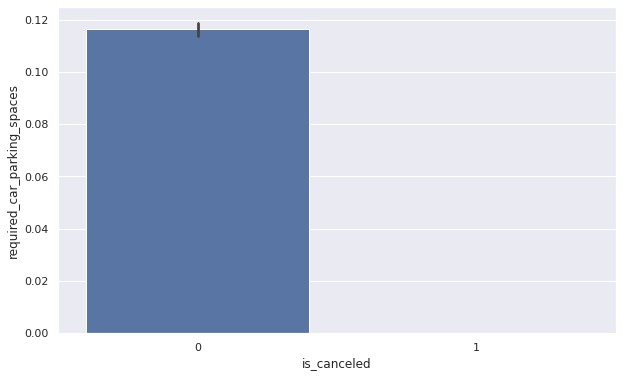

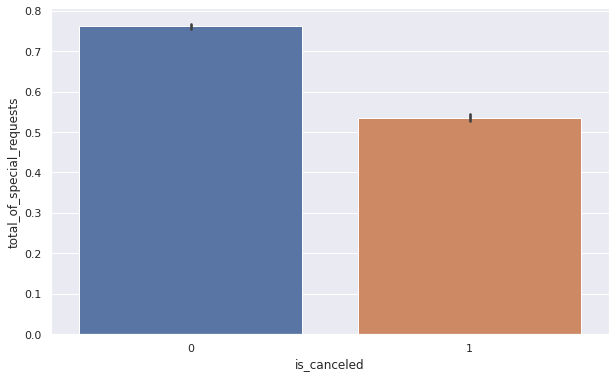

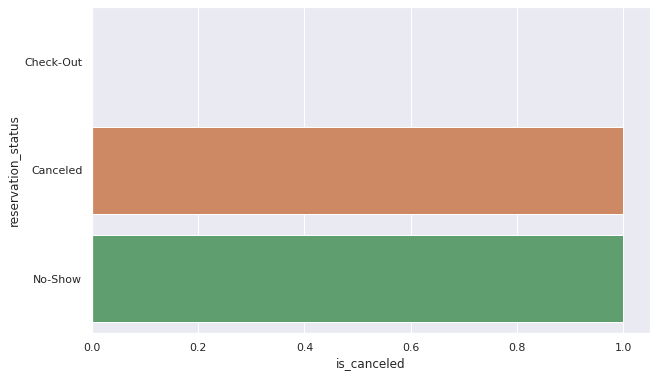

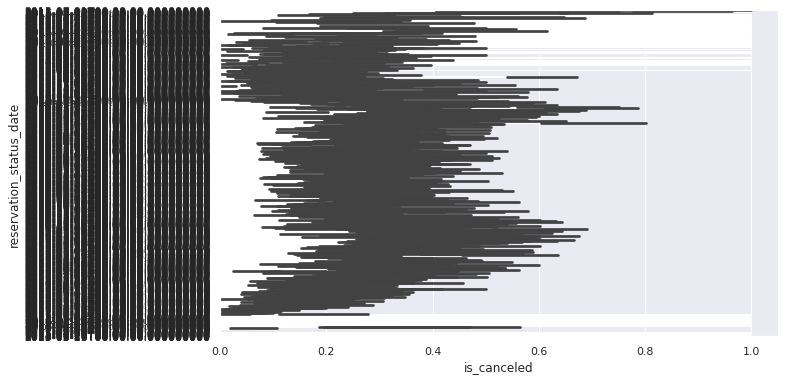

In [28]:
for col in df.columns.tolist():
  plt.figure(figsize=(10, 6))
  sns.barplot(y=col, x='is_canceled', data=df)

##**Insights from above analysis:-**
1)City hotel has highest number of cancellation as compared to the resort hotel.

2)August,July,April,May,June have more cancellation number as compared to others.

3)Undefined market segment has highest number of cancellation.

4)Unddefined distrubution channel has highest number of cancellation.

5)Repeated guest are likely not cancelled the bookings.

6)L type room assigned customer high in number od cancellation.

7)Non -refund type of bookings has high number of cancellation.

8)Transient type customers had high cancellation rat.



**Multivariate analysis**

In [29]:
sns.pairplot(df, size=3)

Output hidden; open in https://colab.research.google.com to view.

##**Correlation**

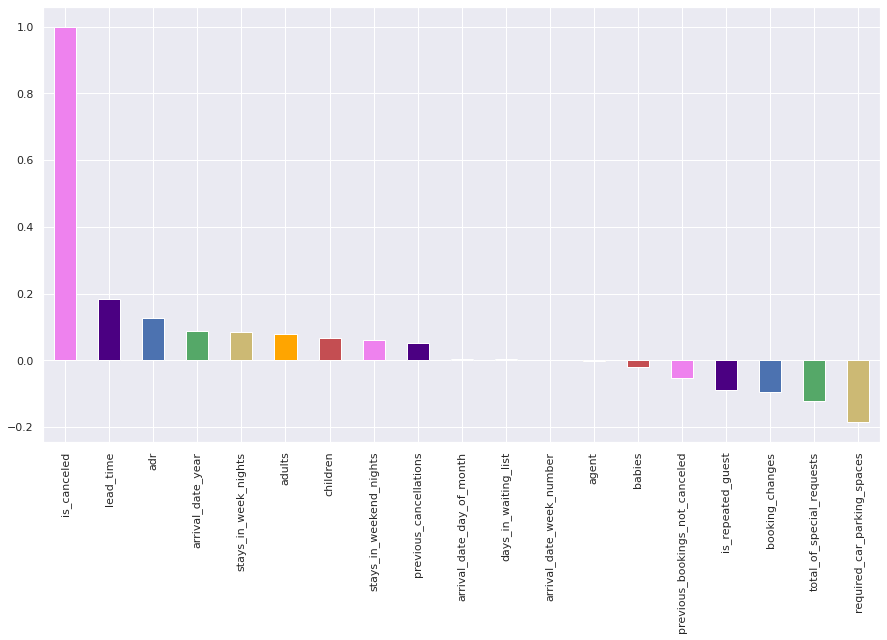

In [30]:
# correlation

plt.figure(figsize=(15,8))
df.corr()['is_canceled'].sort_values(ascending = False).plot(kind='bar',color = ['violet','indigo','b','g','y','orange','r'])

Text(0.5, 1.0, 'Correlation Heatmap')

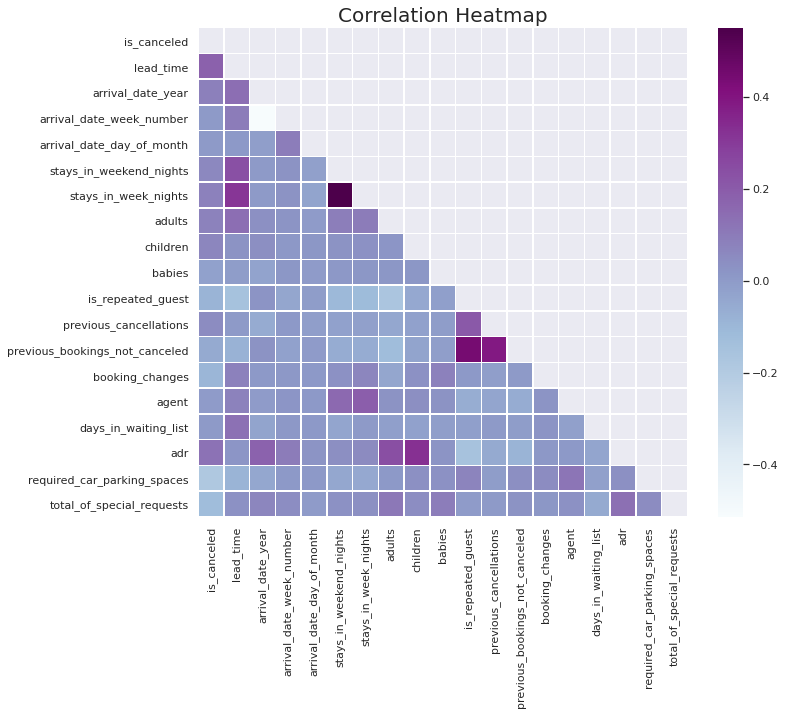

In [31]:
corr=df.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

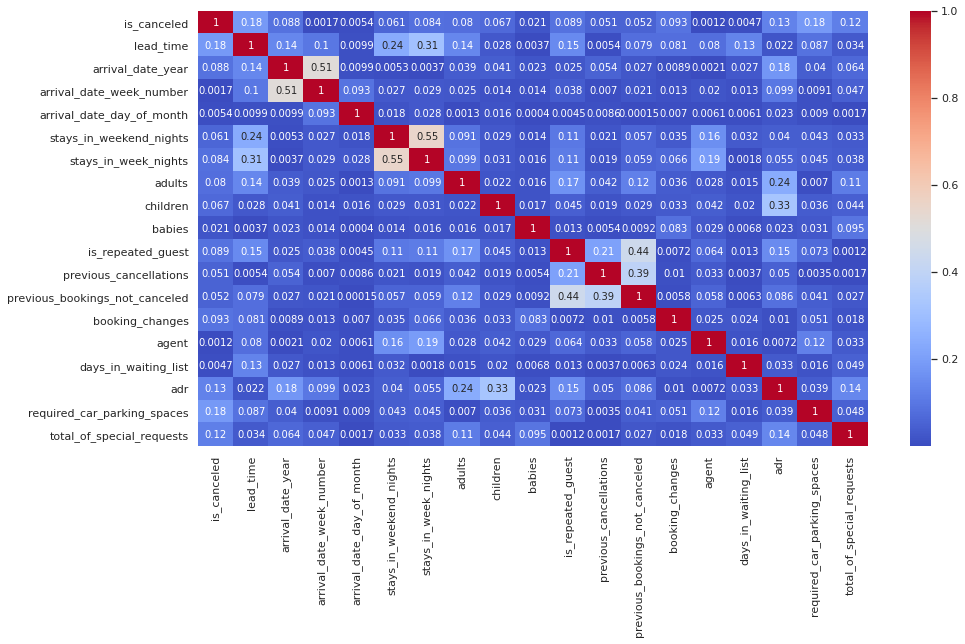

In [32]:
## Correlation
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

####**Observations:**

By looking at the correlation matrix I saw that IS cancelled has a strong positive correlation with lead time (0.18) where as required car parking space has a high negative correlation (-0.18) and with total special request with negative correlation (-0.12).

The features repeated guest,previous booking not cancelled have a correlation of 0.44. These feature pairs are strongly correlated to each other.


# **Checking for outliers**


Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.


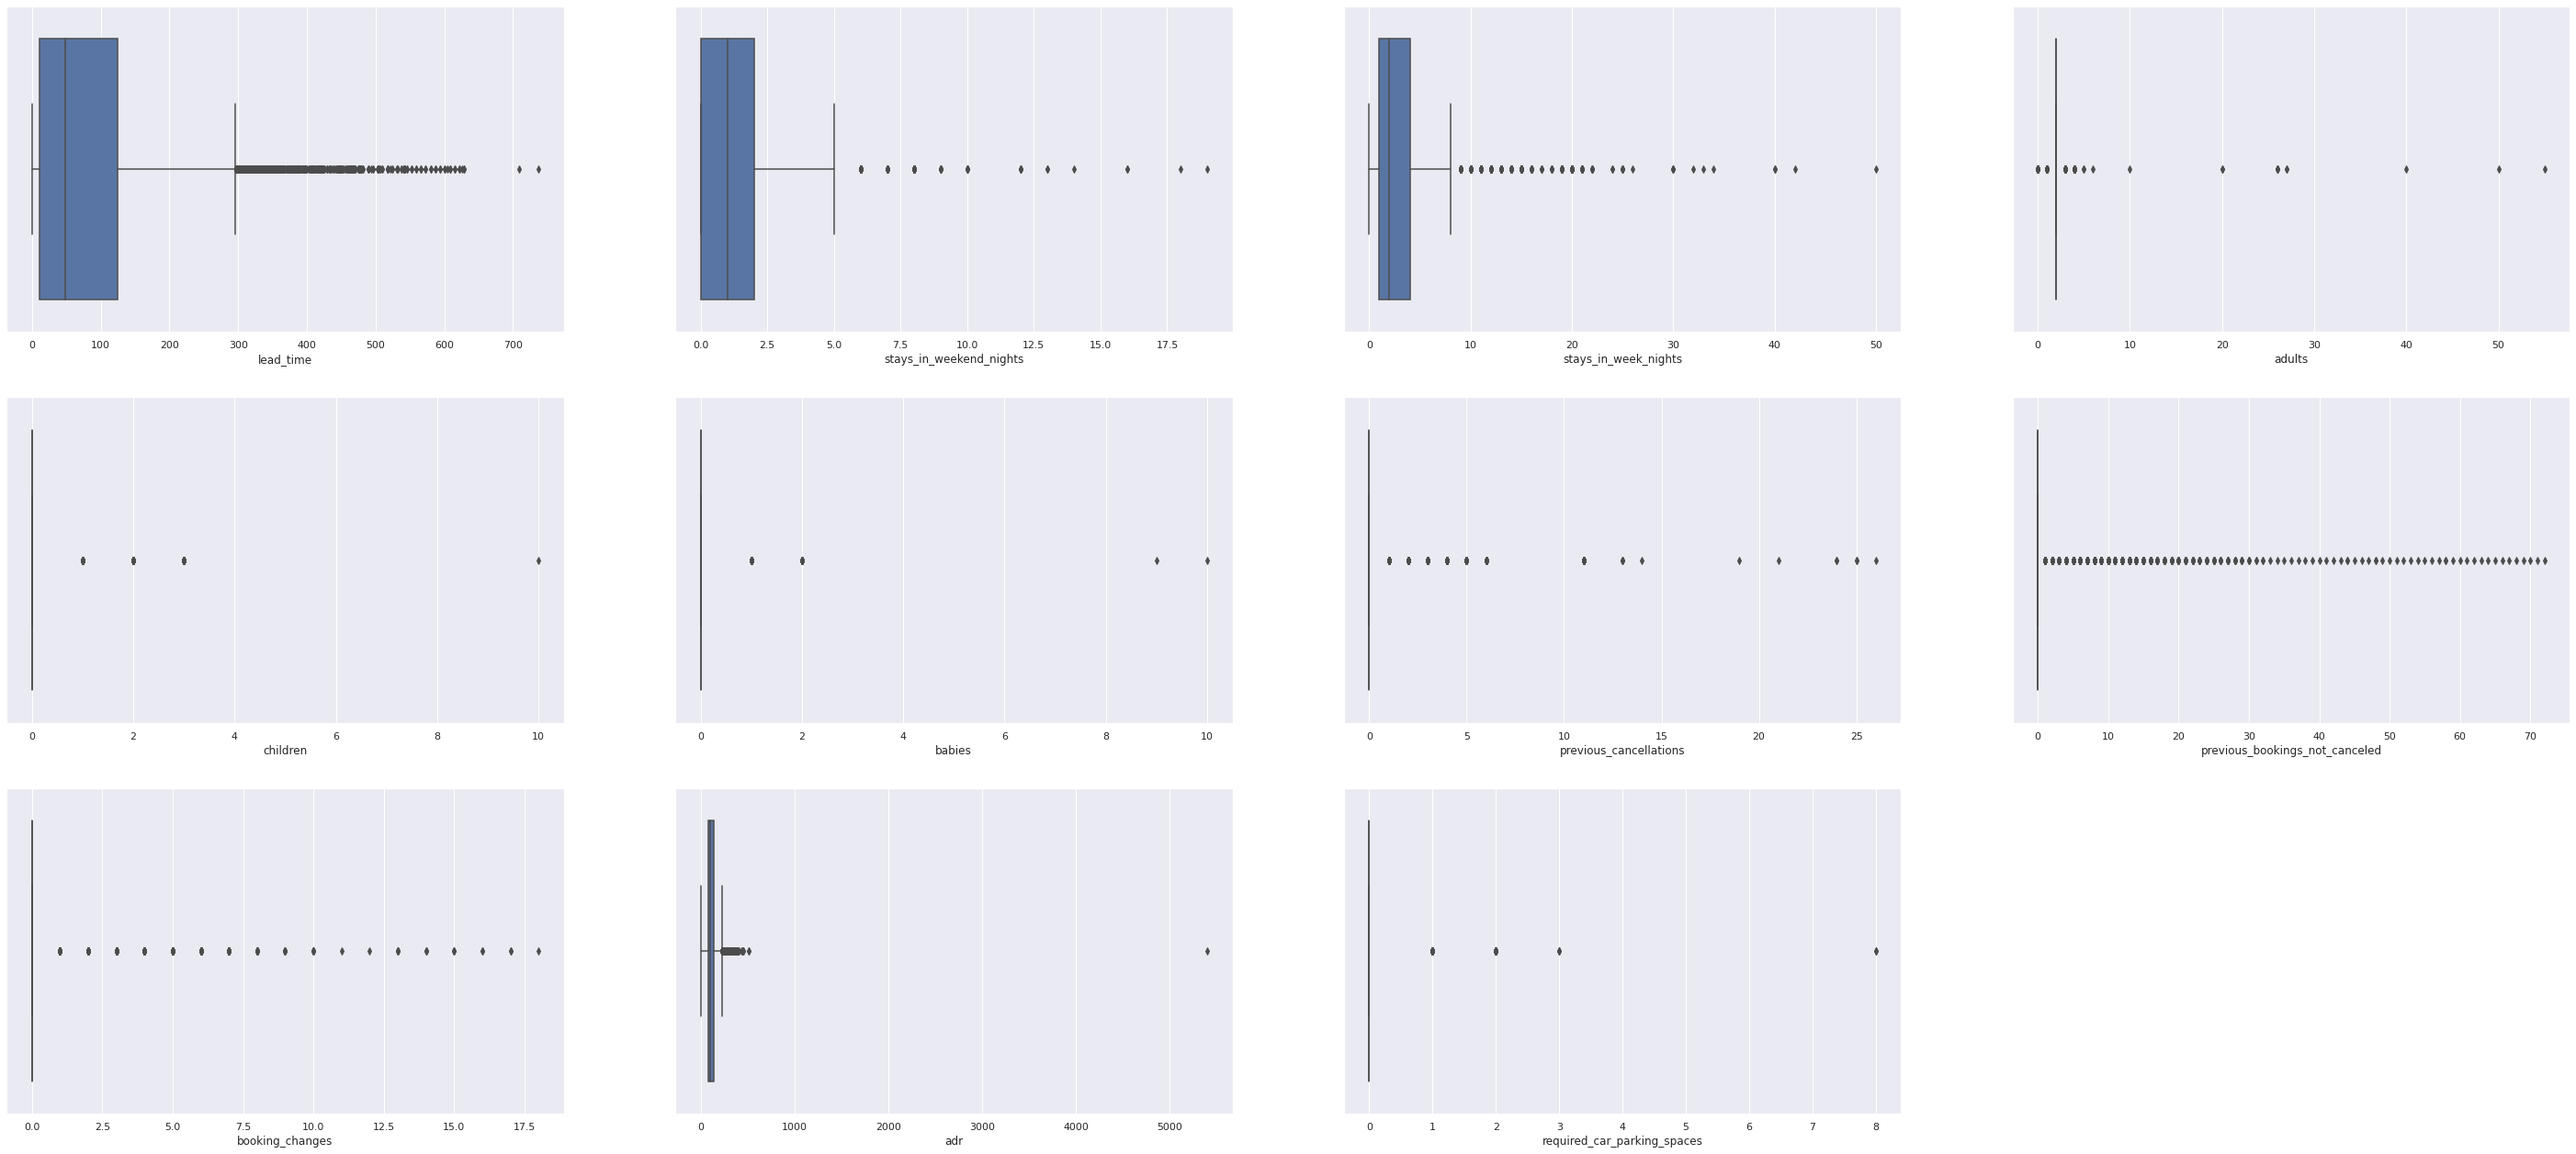

In [33]:
#check whether the data Set contains Outlier 

#plot box plot to find Outliers

warnings.simplefilter(action='ignore', category=FutureWarning)

columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr','required_car_parking_spaces']
n = 1
plt.figure(figsize=(50,30))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])  

In [34]:
#Dropping the outliers
###### METHOD  1 
#calling all columns expect reservation status date because there is invalid comparison between dtype=datetime64[ns] and ndarray 
Q1 =df.iloc[:,0:29].quantile(0.25)
Q3 =df.iloc[:,0:29].quantile(0.75)
IQR = Q3 - Q1
print("\nInternal Quartile Range=\n",IQR)
sorted('')
df1 = df.iloc[:,0:29][~((df.iloc[:,0:29] <Q1 - 1.5*IQR ) | (df.iloc[:,0:29] > Q3 + 1.5*IQR)).any(axis=1)]
df1.head()
df1.shape


Internal Quartile Range=
 is_canceled                         1.00
lead_time                         114.00
arrival_date_year                   1.00
arrival_date_week_number           21.00
arrival_date_day_of_month          15.00
stays_in_weekend_nights             2.00
stays_in_week_nights                3.00
adults                              0.00
children                            0.00
babies                              0.00
is_repeated_guest                   0.00
previous_cancellations              0.00
previous_bookings_not_canceled      0.00
booking_changes                     0.00
agent                             231.00
days_in_waiting_list                0.00
adr                                61.85
required_car_parking_spaces         0.00
total_of_special_requests           1.00
dtype: float64


(39731, 29)

Outliers are present let's remove those outliers.

In [35]:
df.shape

(87223, 31)

# **Exploratory Data Analysis**



###**Q1.What type of hotel does customer book in general?**

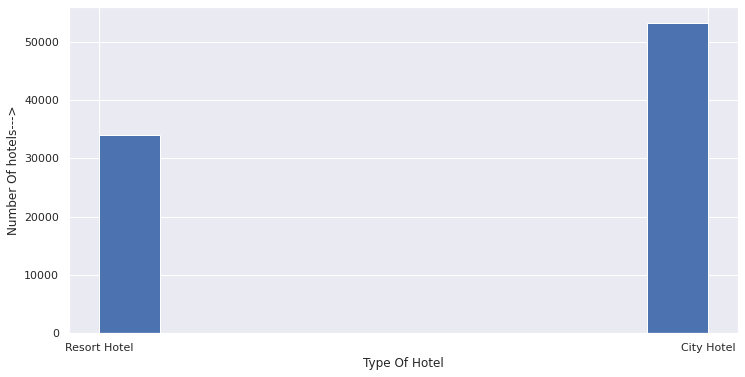

In [36]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(df['hotel'])
ax.set_xlabel('Type Of Hotel')
ax.set_ylabel('Number Of hotels--->')
plt.show()

**Ans Q1 - From bar graph we can conclude that customer book City Hotel type hotels in general.**

###**Q2 - The best time of year to book a hotel room ?**

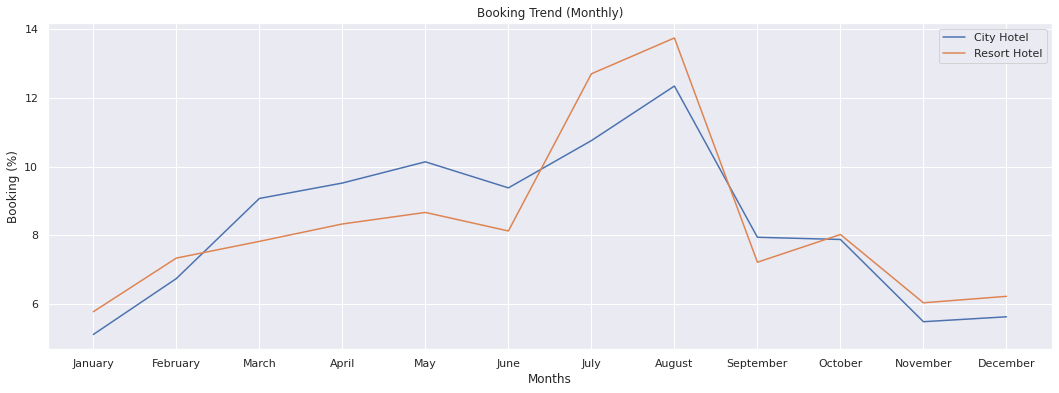

In [37]:
## Order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']
## Select only City Hotel
sorted_months = df.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)
x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100

## Select only Resort Hotel
sorted_months = df.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)
x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100

## Draw the line plot
fig, ax = plt.subplots(figsize=(18,6))
ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')
sns.lineplot(x1, y1.values, label='City Hotel', sort=False)
sns.lineplot(x1, y2.values, label='Resort Hotel', sort=False)
plt.show()

###**Ans Q-2- From the above graphs we can conclude that for best time to book hotel is January followed by november and December.**

##**Q3- Check Boookings across Months in paricular year**

**let's Dig more data for the bookings in particular year.** 

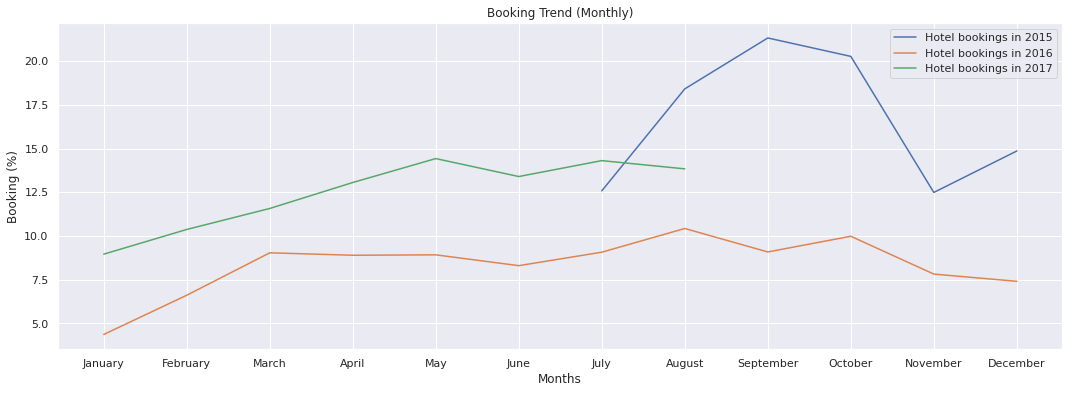

In [38]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']
## Select only City Hotel
sorted_months = df.loc[df.arrival_date_year==2015 ,'arrival_date_month'].value_counts().reindex(new_order)
x10 = sorted_months.index
y10 = sorted_months/sorted_months.sum()*100

## Select only Resort Hotel
sorted_months = df.loc[df.arrival_date_year==2016 ,'arrival_date_month'].value_counts().reindex(new_order)
x20 = sorted_months.index
y20 = sorted_months/sorted_months.sum()*100

## Select only Resort Hotel
sorted_months = df.loc[df.arrival_date_year==2017 ,'arrival_date_month'].value_counts().reindex(new_order)
x30 = sorted_months.index
y30 = sorted_months/sorted_months.sum()*100


## Draw the line plot
fig, ax = plt.subplots(figsize=(18,6))
ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')
sns.lineplot(x10, y10.values, label='Hotel bookings in 2015', sort=False)
sns.lineplot(x20, y20.values, label='Hotel bookings in 2016', sort=False)
sns.lineplot(x30, y30.values, label='Hotel bookings in 2017', sort=False)

plt.show()

###**Ans Q3-We can see that the data for 2015 and 2017 is not for all the months**

###**Q4-Which month has lowest average ADR?**


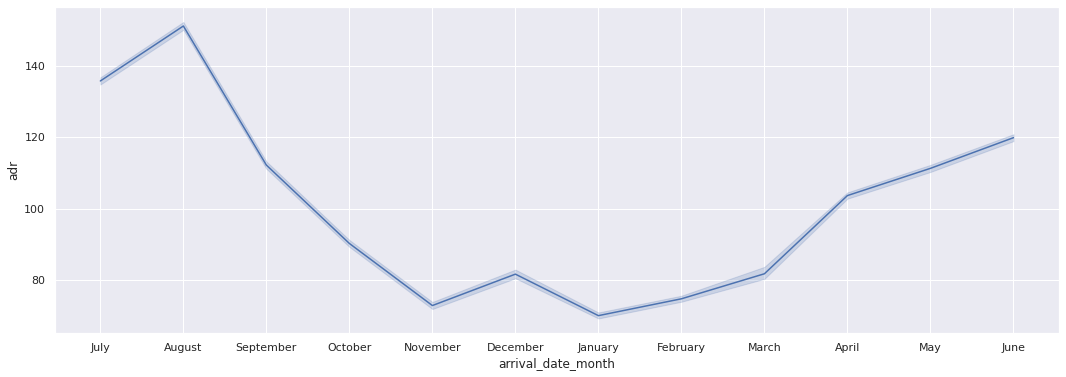

In [39]:
plt.figure(figsize=(18,6))
sns.lineplot(x='arrival_date_month', y='adr', data= df)
plt.show()

###**Ans Q4 -From line graph we can conclude that the January has lowest adr.**

###**Q5.The optimal length of stay in order to get the best daily rate?**

In [40]:
#we have to add stayed_weekend 
df1['stayed_total_nights'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

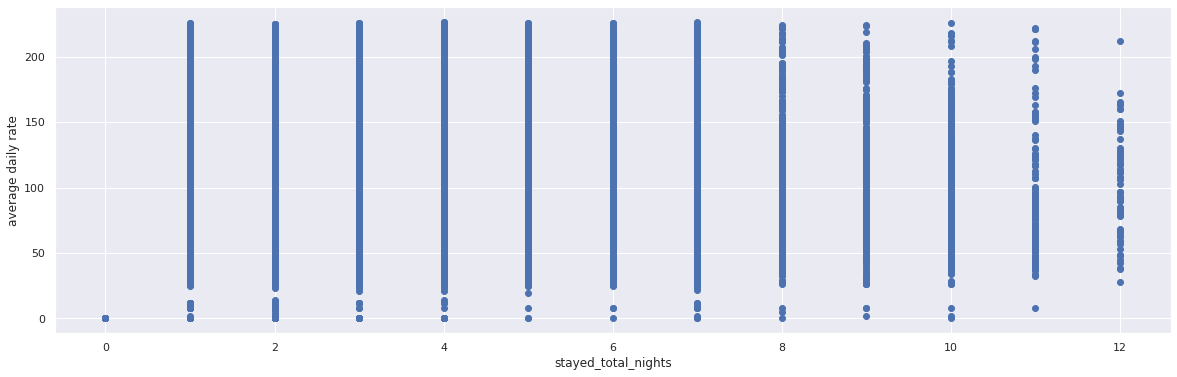

In [41]:
fig, ax =plt.subplots(figsize=(20,6))
ax.scatter(df1['stayed_total_nights'],df1['adr'])
ax.set_xlabel('stayed_total_nights')
ax.set_ylabel('average daily rate')
plt.show()

###**Ans Q5- From the above scatter plot we can conclude to get best daily rate the optimal legth of stay will be more than 10 nights.**

##**Q6 - Which market segment makes highest number of booking?**





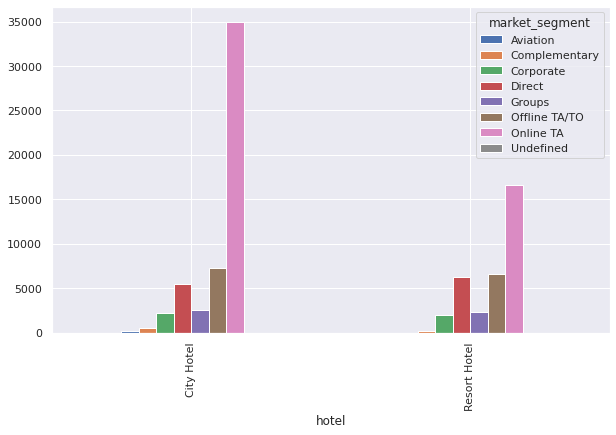

In [42]:
#Relation between hotel and market segment
df2 = df.groupby(['hotel','market_segment']).size()
df2=df2.unstack()
df2.plot(kind='bar',figsize=(10,6))

###**Ans Q6 -From above bar plot we can conclude that the online TA has highest number of bookings.**

###**Q7 -To predict whether or not a hotel was likely to receive a disproportionately high number of special requests?**

In [43]:
list_of_special_request = list(df['total_of_special_requests'])
total_number = len(list_of_special_request) #to get total number of data of total special request

In [44]:
likely_to_get_request = [] #the data of special request was there.
alikely_to_get_request = []# the data of special request was not there.
for number in list_of_special_request:
  if number == 0:
    alikely_to_get_request.append(number) 
  else:
    likely_to_get_request.append(number)


In [45]:
x= len(likely_to_get_request)
y =len(alikely_to_get_request)
hotel_likely_to_get_special_request = (x / total_number)*100
print(f" The hotel was likely to recieve a disproportionality high number off special request is {hotel_likely_to_get_special_request}")

 The hotel was likely to recieve a disproportionality high number off special request is 49.80223106290772


                        Count
Request                      
likely_to_get_request   43439
alikely_to_get_request  43784


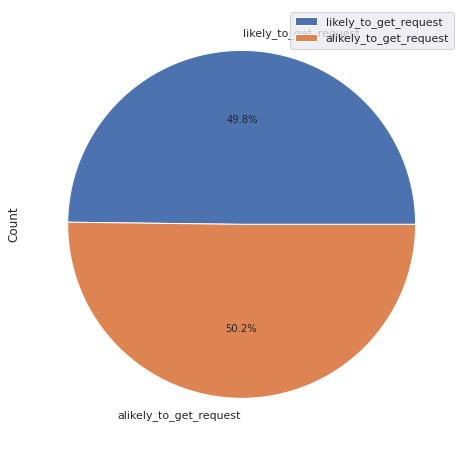

In [46]:
df30 = pd.DataFrame({'Request': ['likely_to_get_request', 'alikely_to_get_request'],
                   'Count': [x,y]})
df30.set_index('Request', inplace=True)
print(df30)
plot = df30.plot.pie(y='Count', figsize=(8,8),autopct='%1.1f%%')

###**Ans 7 -  The chances of hotel was likely to recieve a disproportionality high number off special request is 49.945%**

###**Q8.The country that has most number of guests.?**

**Country wise distrubution on geographical world map.**

In [47]:
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())

In [48]:
# show on map
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["country"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma_r,
                    title="Distrubution of bookings over the world")
guest_map.show()

###**Ans Q8-The above map depicts the information about the nationality of the customers.From the above graph it has been observed that most of the people were coming from Portugal followed by France**

##**Q9-Comparison of Bookings of Weekdays and weekends**

In [49]:
stay_weekendnight = df['stays_in_weekend_nights'].sum()

In [50]:
stay_weeknight=df['stays_in_week_nights'].sum()

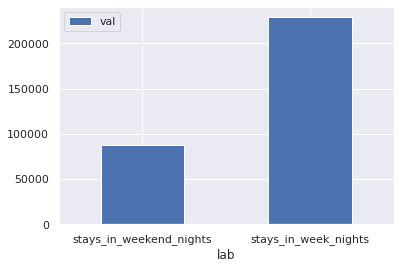

In [51]:
df22 = pd.DataFrame({'lab':['stays_in_weekend_nights','stays_in_week_nights'], 'val':[stay_weekendnight,stay_weeknight]})
ax = df22.plot.bar(x='lab', y='val', rot=0)


##**Ans Q9 -From above graph we can observe that Weekday bookings are higher than the Weekend numbers. That is an interesting finding.**

##**Q10- When customers do reservation?**

(array([5904., 3201., 1922., 1703., 1565., 1416., 1299., 1189., 1019.,
        1761.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

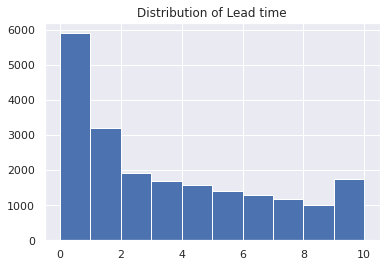

In [52]:
plt.title("Distribution of Lead time")
plt.hist(df.lead_time, bins=[0,1,2,3,4,5,6,7,8,9,10])

##**Ans Q 10-We can see that for the majority of the hotels guests the lead time is zero (which means that they mad the reservation at the same day that they arrived to the hotel.)**

##**Q 11 - If the customers are not alloted their reserved room type does it affect cancellation of booking?**

In [53]:
df['reserved_is_alloted']=" "

In [54]:
def f(row):
    if row['reserved_room_type'] == row['assigned_room_type']:
        val = 1
    else:
        val = 0
    return val

In [55]:
df['reserved_is_alloted'] = df.apply(f, axis=1)

In [56]:
df['reserved_is_alloted'].value_counts()

1    74236
0    12987
Name: reserved_is_alloted, dtype: int64

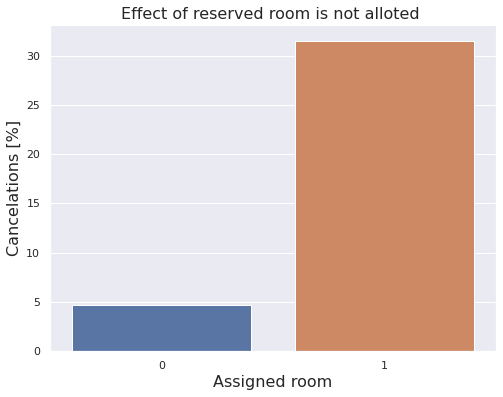

In [57]:
cancel = df.groupby("reserved_is_alloted")["is_canceled"].describe()

#show figure:
plt.figure(figsize=(8, 6))
sns.barplot(x=cancel.index, y=cancel["mean"]*100 )
plt.title("Effect of reserved room is not alloted ", fontsize=16)
plt.xlabel("Assigned room", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

##**Ans Q 11- We can see that less percentage of people tend to cancel their bookings if they are not assigned room type which they reserved before.**

##**Conclusion**


After Performing the EDA, Below are some of the conclusions i came up with :

1.Peak Seasons are August and July whereas Off Seasons are January and December.Hence January and December were the best months to book a Hotel.

2.Most of the people were coming from Portugal followed by France

3.The Hotel was likely to receive a disproportionately high number of special requests is 49.80%.

4.Customer prefered city type Hotels.

5.majority of bookings are accompanied with a breakfast or dinner.

6.The hotels need to have more of Type A room followed by other types.

7.Transient type customer are high in number.

8.We observe that Weekday bookings are higher than the Weekend numbers. That is an interesting finding.

9.From correlation matrix we can conclude that for booking cancellation key parameters lead time, adr,Required car parking space and total special request are responsible.

10.Optimal lenght of days to stay in hotel to get best daily rate is more than 10 days.